# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/uk/tiree/dat.txt', 1.9, 4 
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend, try 2
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/topeka/hr_avg.csv', 0.7 # High 0
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 4
# file_path = 'data/ECMWF/venezuela/8N67W/dat.csv' # direction block
# file_path = 'data/ECMWF/chilean/52S75W/dat.csv'
# file_path = 'data/ECMWF/iceland/65N17W/dat.csv' # odd-even in month, good enough
file_path = 'data/ECMWF/germany/49N9E/dat.csv' # miss peak
# file_path = 'data/ECMWF/sudan/18N32E/dat.csv'
# file_path = 'data/ECMWF/china/24N121E/dat.csv' # good enough
# file_path = 'data/ECMWF/australia/37S142E/dat.csv' # slightly miss the peak, odd-even

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
elif 'asos' in file_path:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
    knot_unit = True
else:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.x, df.y))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d')
    df['date']=df['date'].astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    df['type']='default'
    df['wind_type']='default'
    convert_to_knot = True
    integer_data = False

In [4]:
df

time        lat  lon         x         y     speed  \
0     1979-01-01 00:00:00  49.000004    9  5.259441 -3.808680  6.493672   
1     1979-01-01 06:00:00  49.000004    9  3.885094 -4.099794  5.648209   
2     1979-01-01 12:00:00  49.000004    9  3.586332 -4.292035  5.593152   
3     1979-01-01 18:00:00  49.000004    9  3.146370 -2.069498  3.765962   
4     1979-01-02 00:00:00  49.000004    9  3.158253 -2.541553  4.053893   
5     1979-01-02 06:00:00  49.000004    9  3.091016 -0.526533  3.135541   
6     1979-01-02 12:00:00  49.000004    9  4.692710  0.467602  4.715949   
7     1979-01-02 18:00:00  49.000004    9  2.537054  3.812231  4.579274   
8     1979-01-03 00:00:00  49.000004    9  2.143074 -0.380564  2.176602   
9     1979-01-03 06:00:00  49.000004    9  1.758084 -2.064261  2.711463   
10    1979-01-03 12:00:00  49.000004    9  4.451693  0.259116  4.459227   
11    1979-01-03 18:00:00  49.000004    9  2.091751  1.274903  2.449653   
12    1979-01-04 00:00:00  49.000004    9 -0.837700  2.594853  2.726720   
13    1979-01-04 06:00:00  49.000004    9 -3.462572  0.308320  3.476272   
14    1979-01-04 12:00:00  49.000004    9 -4.776464 -0.662784  4.822229   
15    1979-01-04 18:00:00  49.000004    9 -4.009622 -1.636163  4.330600   
16    1979-01-05 00:00:00  49.000004    9 -2.882386 -0.995608  3.049489   
17    1979-01-05 06:00:00  49.000004    9 -3.125946 -0.634004  3.189592   
18    1979-01-05 12:00:00  49.000004    9 -3.668369 -0.749048  3.744063   
19    1979-01-05 18:00:00  49.000004    9 -2.947110 -0.399206  2.974025   
20    1979-01-06 00:00:00  49.000004    9 -2.820947 -0.215523  2.829168   
21    1979-01-06 06:00:00  49.000004    9 -2.005646 -0.159345  2.011966   
22    1979-01-06 12:00:00  49.000004    9 -0.984459  0.249097  1.015485   
23    1979-01-06 18:00:00  49.000004    9 -2.198173  0.174083  2.205055   
24    1979-01-07 00:00:00  49.000004    9 -1.331763  2.051945  2.446237   
25    1979-01-07 06:00:00  49.000004    9 -1.656956  2.358913  2.882702   
26    1979-01-07 12:00:00  49.000004    9 -0.226722  1.779520  1.793905   
27    1979-01-07 18:00:00  49.000004    9  1.040112  2.626732  2.825165   
28    1979-01-08 00:00:00  49.000004    9  1.723644  2.469735  3.011734   
29    1979-01-08 06:00:00  49.000004    9  1.334214  2.708086  3.018916   
...                   ...        ...  ...       ...       ...       ...   
55614 2017-01-24 12:00:00  49.000004    9 -1.175126 -1.526905  1.926749   
55615 2017-01-24 18:00:00  49.000004    9 -1.572231 -1.041986  1.886172   
55616 2017-01-25 00:00:00  49.000004    9 -2.171187 -0.242198  2.184654   
55617 2017-01-25 06:00:00  49.000004    9 -2.240311 -0.192910  2.248601   
55618 2017-01-25 12:00:00  49.000004    9 -4.472687  0.300002  4.482737   
55619 2017-01-25 18:00:00  49.000004    9 -1.326900  1.074772  1.707571   
55620 2017-01-26 00:00:00  49.000004    9 -2.832052  1.082505  3.031887   
55621 2017-01-26 06:00:00  49.000004    9 -1.442935  1.804380  2.310379   
55622 2017-01-26 12:00:00  49.000004    9 -2.538780  0.811714  2.665386   
55623 2017-01-26 18:00:00  49.000004    9 -2.085619  2.217385  3.044110   
55624 2017-01-27 00:00:00  49.000004    9 -2.213448  2.297133  3.190011   
55625 2017-01-27 06:00:00  49.000004    9 -1.664686  1.795107  2.448181   
55626 2017-01-27 12:00:00  49.000004    9 -1.535803  0.656180  1.670109   
55627 2017-01-27 18:00:00  49.000004    9 -2.608135  0.519905  2.659449   
55628 2017-01-28 00:00:00  49.000004    9 -2.094699  1.592822  2.631510   
55629 2017-01-28 06:00:00  49.000004    9 -0.310671  2.813739  2.830838   
55630 2017-01-28 12:00:00  49.000004    9 -0.116953  1.428000  1.432781   
55631 2017-01-28 18:00:00  49.000004    9 -1.346227  1.969069  2.385279   
55632 2017-01-29 00:00:00  49.000004    9 -0.286408  2.359851  2.377168   
55633 2017-01-29 06:00:00  49.000004    9  0.699931  2.058898  2.174618   
55634 2017-01-29 12:00:00  49.000004    9  1.706397  2.423789  2.964210   
55635 2017-01-29 18:00:00  49.000004    9  0.5

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


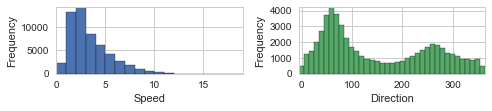

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

lat      lon             x             y         speed  \
count  5.552000e+04  55520.0  55520.000000  55520.000000  55520.000000   
mean   4.900000e+01      9.0      1.134798      0.610110      3.442735   
std    3.157680e-11      0.0      3.144751      2.163517      2.092285   
min    4.900000e+01      9.0    -11.432183     -9.439298      0.033510   
25%    4.900000e+01      9.0     -1.270575     -0.862142      1.916510   
50%    4.900000e+01      9.0      1.002650      0.648953      2.825749   
75%    4.900000e+01      9.0      3.194437      1.915772      4.538925   
max    4.900000e+01      9.0     18.459015     10.437421     18.862267   

                dir          date          HrMn         month  dir_windrose  
count  55520.000000  5.552000e+04  55520.000000  55520.000000  55520.000000  
mean     143.701593  1.997567e+07    900.000000      6.522767    150.977081  
std      111.052688  1.096640e+05    670.826435      3.448779    104.730809  
min        0.016794  1.979010e+07      0.000000      1.000000      0.002085  
25%       38.899090  1.988070e+07    450.000000      4.000000     60.317223  
50%      130.639705  1.997567e+07    900.000000      7.000000    111.934888  
75%      224.056652  2.007070e+07   1350.000000     10.000000    251.563954  
max      359.996467  2.016123e+07   1800.000000     12.000000    359.991979

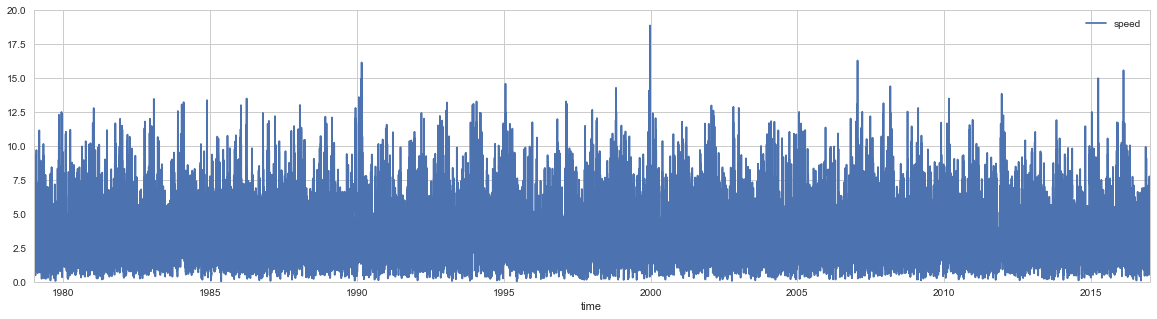

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

True


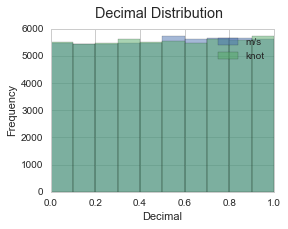

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
else:
    knot_unit = False
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

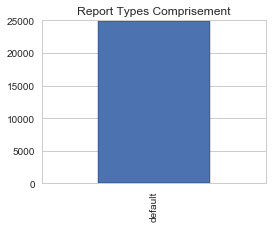

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

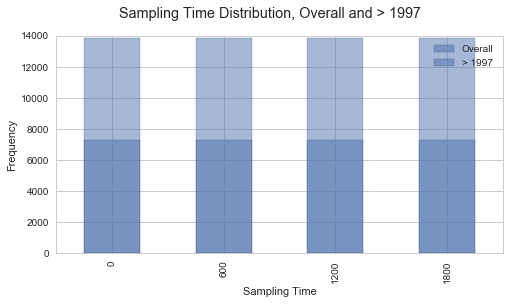

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0]


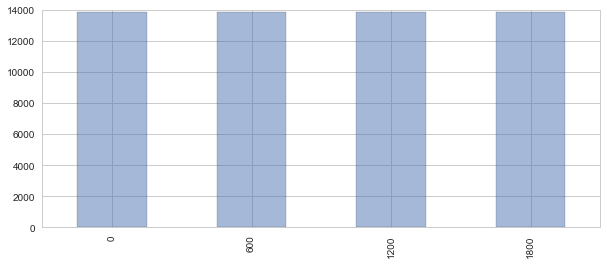

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

sudden increase in speed

lat  lon          x          y      speed  \
time                                                                   
1999-12-26 12:00:00  49.000004    9  18.459015   3.879420  36.665324   
2007-01-18 18:00:00  49.000004    9  13.070150   9.708096  31.648038   
1990-03-01 00:00:00  49.000004    9  15.252164   5.274023  31.370299   
2016-02-08 12:00:00  49.000004    9  12.679472   9.022505  30.250039   
2007-01-18 12:00:00  49.000004    9  11.624750   9.768187  29.515242   
2015-03-31 12:00:00  49.000004    9  14.935374   1.083457  29.108342   
1990-02-27 12:00:00  49.000004    9  14.275352  -4.459485  29.071545   
1995-01-23 00:00:00  49.000004    9  10.490368  10.114553  28.326298   
2008-03-01 06:00:00  49.000004    9  12.938262   6.290564  27.965020   
1998-10-28 12:00:00  49.000004    9  11.552151   8.375764  27.736810   

                            dir      date  HrMn     type wind_type  month  \
time                                                                        
1999-12-26 12:00:00   11.868777  19991226  1200  default   default     12   
2007-01-18 18:00:00   36.603803  20070118  1800  default   default      1   
1990-03-01 00:00:00   19.074797  19900301     0  default   default      3   
2016-02-08 12:00:00   35.435033  20160208  1200  default   default      2   
2007-01-18 12:00:00   40.040074  20070118  1200  default   default      1   
2015-03-31 12:00:00    4.149140  20150331  1200  default   default      3   
1990-02-27 12:00:00  342.651689  19900227  1200  default   default      2   
1995-01-23 00:00:00   43.955093  19950123     0  default   default      1   
2008-03-01 06:00:00   25.928951  20080301   600  default   default      3   
1998-10-28 12:00:00   35.943589  19981028  1200  default   default     10   

                     dir_windrose      incre  incre_reverse  
time                                                         
1999-12-26 12:00:00     78.131223  22.928554      24.310525  
2007-01-18 18:00:00     53.396197   2.132796       4.815835  
1990-03-01 00:00:00     70.925203  11.028935      10.918585  
2016-02-08 12:00:00     54.564967  11.983324       8.047382  
2007-01-18 12:00:00     49.959926   5.412561      -2.132796  
2015-03-31 12:00:00     85.850860   2.433806      13.824820  
1990-02-27 12:00:00    107.348311   6.116639      11.107784  
1995-01-23 00:00:00     46.044907   3.283661       4.553974  
2008-03-01 06:00:00     64.071049   5.726400       1.865342  
1998-10-28 12:00:00     54.056411   3.410429       3.871098

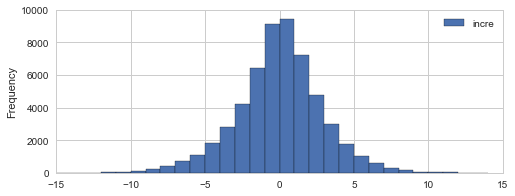

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 1


lat  lon          x          y      speed  \
time                                                                   
2007-01-18 18:00:00  49.000004    9  13.070150   9.708096  31.648038   
1990-03-01 00:00:00  49.000004    9  15.252164   5.274023  31.370299   
2016-02-08 12:00:00  49.000004    9  12.679472   9.022505  30.250039   
2007-01-18 12:00:00  49.000004    9  11.624750   9.768187  29.515242   
2015-03-31 12:00:00  49.000004    9  14.935374   1.083457  29.108342   
1990-02-27 12:00:00  49.000004    9  14.275352  -4.459485  29.071545   
1995-01-23 00:00:00  49.000004    9  10.490368  10.114553  28.326298   
2008-03-01 06:00:00  49.000004    9  12.938262   6.290564  27.965020   
1998-10-28 12:00:00  49.000004    9  11.552151   8.375764  27.736810   
1990-02-26 12:00:00  49.000004    9  10.633822   9.447149  27.649567   

                            dir      date  HrMn     type wind_type  month  \
time                                                                        
2007-01-18 18:00:00   36.603803  20070118  1800  default   default      1   
1990-03-01 00:00:00   19.074797  19900301     0  default   default      3   
2016-02-08 12:00:00   35.435033  20160208  1200  default   default      2   
2007-01-18 12:00:00   40.040074  20070118  1200  default   default      1   
2015-03-31 12:00:00    4.149140  20150331  1200  default   default      3   
1990-02-27 12:00:00  342.651689  19900227  1200  default   default      2   
1995-01-23 00:00:00   43.955093  19950123     0  default   default      1   
2008-03-01 06:00:00   25.928951  20080301   600  default   default      3   
1998-10-28 12:00:00   35.943589  19981028  1200  default   default     10   
1990-02-26 12:00:00   41.618073  19900226  1200  default   default      2   

                     dir_windrose      incre  incre_reverse  
time                                                         
2007-01-18 18:00:00     53.396197   2.132796       4.815835  
1990-03-01 00:00:00     70.925203  11.028935      10.918585  
2016-02-08 12:00:00     54.564967  11.983324       8.047382  
2007-01-18 12:00:00     49.959926   5.412561      -2.132796  
2015-03-31 12:00:00     85.850860   2.433806      13.824820  
1990-02-27 12:00:00    107.348311   6.116639      11.107784  
1995-01-23 00:00:00     46.044907   3.283661       4.553974  
2008-03-01 06:00:00     64.071049   5.726400       1.865342  
1998-10-28 12:00:00     54.056411   3.410429       3.871098  
1990-02-26 12:00:00     48.381927   7.310807       1.768563

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0.016794      1
0.017866      1
0.018479      1
0.023141      1
0.035838      1
0.041086      1
0.041313      1
0.044635      1
0.048287      1
0.051799      1
0.052109      1
0.056937      1
0.059985      1
0.063134      1
0.069304      1
0.074513      1
0.078759      1
0.083437      1
0.086849      1
0.089691      1
0.101609      1
0.112828      1
0.112969      1
0.113581      1
0.114863      1
0.118765      1
0.119614      1
0.122560      1
0.132912      1
0.135862      1
             ..
359.877281    1
359.886012    1
359.890925    1
359.896386    1
359.897130    1
359.902047    1
359.902534    1
359.909795    1
359.911123    1
359.916650    1
359.926190    1
359.926740    1
359.932241    1
359.936450    1
359.941473    1
359.942475    1
359.942843    1
359.942931    1
359.944955    1
359.953397    1
359.955251    1
359.961425    1
359.962643    1
359.963169    1
359.964390    1
359.964422    1
359.976849    1
359.978008    1
359.994455    1
359.996467    1
Name: dir, dtype: int64

0 10


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.00815651380333


Series([], Name: speed, dtype: int64)


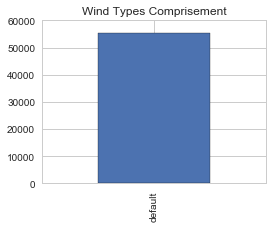

In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

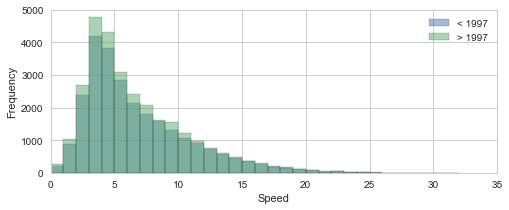

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

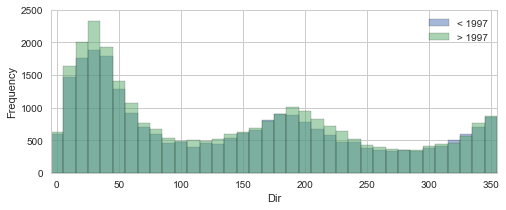

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [lat, lon, x, y, speed, dir, date, HrMn, type, wind_type, month, dir_windrose]
Index: []

1979 - 1979


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


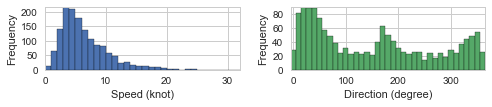

1980 - 1984


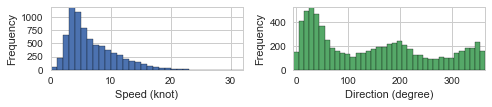

1985 - 1989


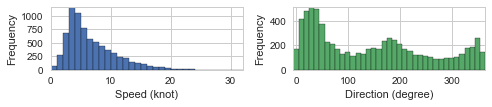

1990 - 1994


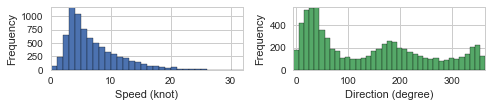

1995 - 1999


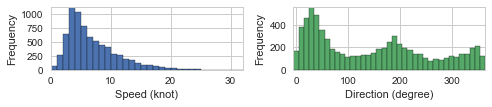

2000 - 2004


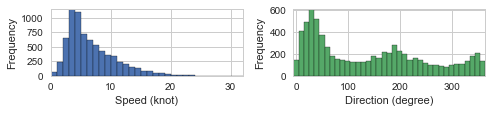

2005 - 2009


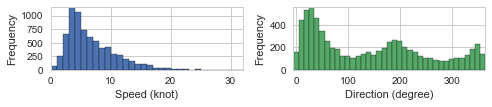

2010 - 2014


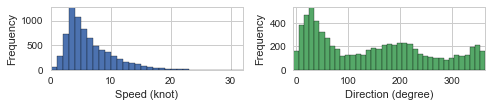

2015 - 2016


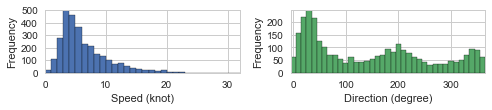

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 14.0)

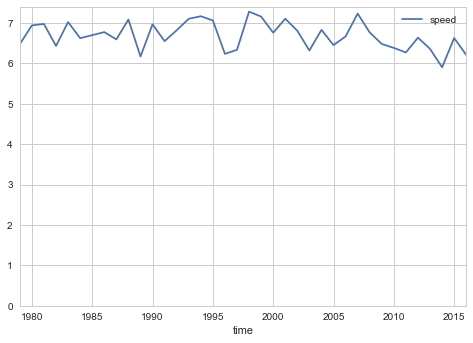

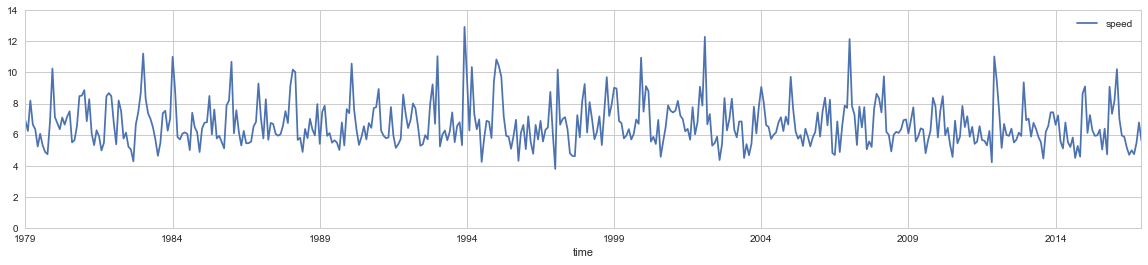

In [25]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 1000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAAB6CAYAAADDPa27AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEVFJREFUeJzt3XlsVOW7wPHvtEM7052lAgKtLYiIVUtFirlK8sMFIxcM
AlIkcCPIHyaIpIgsshSotBCQREIIUUhIkahBNKBXjCgJmwsFaij7RWihUChdpp2lne3cPwYOM2UZ
aHs6S5/PPzDnnPf0OYVn3jPved9ndIqiKAgh2lREoAMQIhxJYgmhAUksITQgiSWEBiSxhNCAJJYQ
GpDEClKKovDee++xdetWdVtdXR0fffQR2dnZvPjii3z++ee43W51v9lsZsGCBQwdOpShQ4cyd+5c
amtr1f0Oh4Nly5aRnZ1NdnY2q1atwuVytet1dRSSWEHI5XKRl5fH/v37fbZ/8MEHnD59mg0bNrB+
/Xp+/fVXVq9ere5funQp586dY/PmzWzatIlz586xcOFCdf9nn33GgQMH2LhxI2vXrmXnzp1s3Lix
3a6rQ1FEUCkvL1dycnKU//znP8rgwYOVoqIiRVEUpbS0VOnfv79y4sQJ9dhjx44pTz31lGKxWBRF
UZSsrCxl165d6v6dO3cqmZmZiqIoSmNjo/Lss88qe/bsUffv2LFDeeGFFxSXy9Uel9ahSI8VZI4d
O0Z6ejo7duwgPj5e3V5eXo7BYGDgwIHqtgEDBuBwOCgtLQWgc+fO7Nq1i4aGBsxmMz/++CMZGRkA
nDp1CpvNxpAhQ9T2gwcPprq6mvLy8na6uo5DH+gAhK/Ro0czevToO7YnJyfT2NhITU0NXbp0AaCi
ogKAmpoaAJYvX86cOXN4/vnnAejTpw/btm0D4Nq1axiNRp9kTU5OBqCyspLHHntMs2vqiKTHChHP
PPMMqampLFmyBJPJRG1tLYWFhej1ehwOBwD//vsvaWlpbNmyhS1bthAfH8+cOXNQFAWbzUZ0dLTP
OaOiogCw2+3tfj3hTnqsEBEVFcW6devIzc0lOzsbo9HIjBkzOHHiBHFxcZSXl5Ofn8/u3btJTU0F
YN26dbz88sv8/fffGAyGOxLo1muj0dju1xPuJLFCyBNPPMFPP/1EdXU1cXFxuFwuVq1aRZ8+fSgt
LcVgMKhJBdCrVy86d+7MpUuX6NevH1arFbPZTFxcHABVVVUAdO/ePSDXE87kVjBEmEwm3nnnHSoq
KujatSvR0dHs3buX5ORk+vbtS/fu3bFarVy+fFltc+PGDerq6khJSWHAgAEYjUaOHDmi7i8uLqZb
t26kpKQE4pLCmiRWiEhMTKSpqYmCggIuXrzI/v37WbZsGTNmzECn05GZmUlGRgZz5syhtLSUkydP
kpubS0ZGBoMHD8ZgMDBu3DiWLVvGkSNH+OOPP1izZg1TpkwJ9KWFJZ2iBMdCR+93UuExc+ZMRo4c
yYgRIwC4fv06mzZt4uzZsyQkJDBy5Ehee+019XiTycTWrVs5fvw4AE8//TSTJ08mISEB8Hym2rJl
C3/++SedOnVi2LBh5OTkEBEh76/+PPfccw91fFAl1sMGHwgSZ9sJhRihZXHKW5UQGpDEEkIDklhC
aEASSwgNSGIJoQFJLCE0IIklhAYksYTQgCSWEBqQxBJCA5JYQmggJNdjKYqC1Wq9Y3tMTAw6nS4A
EQnhKyQTy2q1cuDoBQyGGHVbY6OVF7PSiI2NDWBkQniEZGIBGAwxGGNi/B8oRAD4TSy3201eXh5n
zpwhKiqK/Px8n+XfADabjXfffZdPP/2Uvn37AjBmzBh1CXjv3r0pKCjQIHwhgpPfxNqzZw92u51v
vvmGkpISCgsL2bBhg7r/+PHjLFmyhGvXrqnbmpqaUBSFoqIiTYJ2u92Y6mqx2xvVbTarDbc7WZOf
J8TD8ptYR44c4aWXXgIgMzNTLQ55i91uZ/369Xz88cfqttOnT2Oz2Zg6dSpOp5Pc3FwyMzPbLOja
2loOXt5LfFKiuq2hzkRmbbJP3TwhAsVvYnlX9QGIjIzE6XSi13ua3m1lpcFgYNq0aYwfP56LFy8y
ffp0du/erba5lwddnl9ZWUmTy06Uy6Fua3LaOXz4sE9VV4PBoMkoYaiUEQiFOEMhxpbwm1hxcXFY
LBb1tdvt9psgaWlppKamotPpSEtLIykpiaqqKnr27Hnfdg+6/Lm8vJzD1jISb1aEBVAcTmy6JFzR
jwKeUcJBT7b9KGE4Lydvb6EQI7Qs+f0+IM7KymLfvn0AlJSU0L9/f78n3b59O4WFhYCntLHZbFbL
GWspOtqIMcYzWug9FC9Ee/PbY7366qscPHiQnJwcFEVhxYoV7Nq1C6vVyoQJE+7aZty4ccyfP5+J
Eyei0+lYsWKF315OiHDi9397REQEy5Yt89l2a0jdm/cIYFRUFGvWrGmD8IQITTJXUAgNhM39meJ2
01BvwlTn+Uobea4lAilsEstmsVHi+JsrBk/tcnmuJQIpbBILwBAXQ2yiJ5GcToefo4XQjnzGEkID
klhCaEASSwgNSGIJoQFJLCE0IIklhAYksYTQgCSWEBoIqwfE3hQ81Zy815JJeTTRXvz2WG63m8WL
FzNhwgQmT55MWVnZHcfYbDZycnI4f/78A7fRmsvppPhkBcUnr1F88hoHjl64ay1CIbTgN7G8i8nM
nj1bXcB4y/Hjx5k0aRKXLl164DbtRRY+ikDxm1gPWkwmPT39gdsIEe40KSbjr829PEwxmTpTHS6v
j0v19Sb00Z2IrvEsGzGZ6iivLcPhdAPQ2GgjsukKRqPxgX5GW8QZaKEQZyjE2BKaFJNpSRu4dzEZ
t9tNbW3t7aD1ehItZSR5FZOx1JjQR+vpcnOb4nCSkpBK6mOentRmtTJoYPdWF5cJpQIowR5nKMQI
LUt+v//bs7Ky2Lt3L2+88cYDF5NpSZv7qampYcvBb4iN9/SCFWUVOPWGVp1TCC1pUkzmbm1aw2q1
Umd14TZ4PhI22JxExbpadU4htKRJMZm7tWmtSL0efadOnvPrO7XpuYVoa+H7gFhqYIgACtvEal4D
w1RTQ3KcnV69eqnH9OrVi8jIyECFKMJY2CYW+NbAqKm6QVHx//LIZU+Za3OdiZkjJpGSkhLIEEWY
CuvEai4uIYHErl38HyhEK8nsdiE00KF6LG/KzYfO3g+MO3fuTESEvNeI1uuwiWW1WPm+dDc9qnsA
YGkw8z//NYFu3boFODIRDjpsYrmcLuqBWIenh6q3umRZiWgzHTaxAPSRtx86R8rXDIk2JB8ohNCA
JJYQGpD7n5vcbjcVFRU+22RmhmgpSaybzKYGn5kZDTW1TBn63/Tu3dvnOLfbHYjwRIjxm1hut5u8
vDzOnDlDVFQU+fn5pKamqvt///131q9fj16vZ+zYsbz99tsAjBkzRl1F3Lt3bwoKCjS6hLbjPTPD
2mDmx9N76NHQU91vqTfzVPSdM/uFaM5vYnkXhikpKaGwsJANGzYA4HA4KCgoYPv27RiNRiZOnMjw
4cOJj49HURSfpSShRgE6GaIxxNxeUOmwO1DcSuCCEiHDb2LdrzDM+fPnSUlJITExEfAsrT98+DCP
PvooNpuNqVOn4nQ6yc3NJTMzU6NL0IbL6aKyugGd4XaJgfoaE30S5AGy8K9VxWTMZrPPV5HGxsZi
NpsxGAxMmzaN8ePHc/HiRaZPn87u3btbXEymefGY5oVj7ratrV7XNzSoP6PBYoaE0CmAEgpxhkKM
LdGqYjLN91ksFuLj40lLSyM1NRWdTkdaWhpJSUlUVVXRs2fPO87v7V6FRcrLyzlsLSPxZqGY5oVj
7ratrV8DRLjc1NfXM3ToUPV3AfjMLwyW+YahUKglFGKEABST6du3L2VlZdTV1RETE0NxcTHTpk1j
+/btnD17lry

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOQAAAB6CAYAAACvO/++AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFjlJREFUeJztnX1wVNXdxz9JNvuSV8KrPj4EJVWDhAiIQqcWRiziU9A8
U2JIkGQGpYPtKFVaBrEFKYkFnBZmyiCDFWcY0AEGeaxo1So69Q1ECBgIiVAKCQkvySb7vpvdze55
/lj2kl3yAmSzezc5n5kMe+/dc+/vXPZ7z++e8zu/kyCEEEgkElWQGGsDJBLJVaQgJRIVIQUpkagI
KUiJREVIQUokKkIKUiJREVKQ/QQhBAsXLmTHjh3KPrPZzO9+9zsmT57Mgw8+yF//+lf8fr9y3G63
89JLLzFlyhSmTJnCsmXLMJlMynGv18vq1auZPHkykydP5tVXX8Xn80W1XgMNKch+gM/nY9WqVXz5
5Zch+5977jlqa2vZvHkzmzZt4pNPPuHPf/6zcvyPf/wjp0+f5s0332Tr1q2cPn2aP/zhD8rx9evX
89VXX7FlyxY2bNjAe++9x5YtW6JWrwGJkMQ19fX1ori4WDz00ENi0qRJYvv27UIIIU6cOCHuuusu
UV1drXz36NGjYuzYscLhcAghhJg4caLYt2+fcvy9994T48ePF0II0dbWJu69917x6aefKsf37t0r
fvzjHwufzxeNqg1IZAsZ5xw9epTRo0ezd+9e0tPTlf319fXo9XruueceZV9ubi5er5cTJ04AkJWV
xb59+7DZbNjtdt5//33y8vIAqKmpweVy8cADDyjlJ02aREtLC/X19VGq3cBDE2sDJL3j8ccf5/HH
H79m/7Bhw2hra6O1tZXBgwcD0NjYCEBraysA5eXlLF26lPvvvx+AkSNH8vbbbwNw+fJlDAZDiMiH
DRsGwKVLl7j99tv7rE4DGdlC9lPy8/MZNWoUL7/8MhaLBZPJxNq1a9FoNHi9XgD+85//cMcdd7Bt
2za2bdtGeno6S5cuRQiBy+VCp9OFnFOr1QLg8XiiXp+Bgmwh+ylarZaNGzeyZMkSJk+ejMFg4Nln
n6W6upq0tDTq6+upqKjgo48+YtSoUQBs3LiRhx9+mEOHDqHX668RXnDbYDBEvT4DBSnIfszdd9/N
Bx98QEtLC2lpafh8Pl599VVGjhzJiRMn0Ov1ihgBbrvtNrKysjh//jw/+tGPcDqd2O120tLSAGhu
bgZgxIgRManPQEC6rP0Ui8XCvHnzaGxsZMiQIeh0Oj7//HOGDRtGTk4OI0aMwOl00tDQoJQxGo2Y
zWays7PJzc3FYDBw5MgR5fjhw4cZOnQo2dnZsajSgEAKsp+SmZmJ2+1mzZo1nDt3ji+//JLVq1fz
7LPPkpCQwPjx48nLy2Pp0qWcOHGCkydPsmTJEvLy8pg0aRJ6vZ7CwkJWr17NkSNHOHDgAH/5y18o
KyuLddX6NQlCxN8E5Y5PbclVFi9ezKxZs5g5cyYATU1NbN26lVOnTpGRkcGsWbN45JFHlO9bLBZ2
7NjB8ePHARg3bhylpaVkZGQAgXfGbdu2cfDgQZKTk5k6dSrFxcUkJsrneHfcd999N102bgXZm0pH
C2lnZIkHO3tro3zUSSQqQgpSIlERUpASiYqQgpRIVIQUpESiIqQgJRIV0e9C5/x+f8is9yBZWVly
/EyievqdIE0mE299+w6pGWnKPofVzpOT5zBkyJAYWiaR9EyPgvT7/axatYoffvgBrVZLRUVFSEDy
Z599xqZNm9BoNMyZM4eioqIuy7zwwgsYjUYgMDfv3nvvZcOGDVRUVFBZWUlqaioAr732Wsg8vBsl
NSON9EEZN11eIokVPQry008/xePxsGvXLo4dO8batWvZvHkzEEiCtGbNGvbs2YPBYKCkpITp06dT
WVnZaZkNGzYAgZCtsrIyli9fDkB1dTVvvPGGMpFWIhmo9PhSdeTIEX76058CMH78eCX9A8CZM2fI
zs4mMzMTrVbLfffdx3fffddtGQjMu5s/fz7Dhw/H7/dTV1fHypUrKS4uZs+ePZGsn0QSV/TYQnac
DweQlJREe3s7Go0Gu90e4lqmpqZit9u7LdPS0sKBAweU1tHpdDJ//nwWLFiAz+ejrKyMvLw8cnNz
u7WrqwBzk8lEg7GBVGuHd0iLjQPmAwwaNEjZp9frSUhI6Kn6vSZeAuGlneqgR0GmpaXhcDiUbb/f
j0aj6fSYw+EgPT292zIfffQRs2fPJikpCQjMPi8rK1NmoU+ZMoXa2toeBdlVAG99fT3/aj6JSLr6
oHB5HJxv8eDXBa7hdrt4dNrdvXpPvR7iIRgapJ2RpLcPjB5d1okTJ/LFF18AcOzYMe666y7lWE5O
DnV1dZjNZjweD4cPH2bChAndljlw4ABTp05Vts+dO0dJSQk+nw+v10tlZSVjx47tVaWSNBo0ycnK
n8fdTo39OFX2SqrslRxuPtjp0IhEEmt6bCFnzJjB119/TXFxMUII/vSnP7Fv3z6cTidz587lxRdf
5Omnn0YIwZw5cxgxYkSnZYKcPXuWkSNHKts5OTkUFBRQVFREcnIyBQUF3HnnnRGvqD4thdTMQIvY
3u6N+PklkkjQoyATExNZvXp1yL6cnBzl8/Tp05k+fXqPZYJ88MEH1+xbuHAhCxcuvC6DJZL+TL8L
DLgexJVonuC4J8hIHok6GJCCdDmcvF/7KbfYbgVkJI9EPQxIQQKkpKfKaB6J6pA+mkSiIqQgJRIV
IQUpkaiIuH+HFELgdDqVbafTSdzltZRIrhD3gnQ6nXxVeRa9PgWA+rrz+OWy25I4Je4FCaDXp2BI
CQhSpzNAe4wNkkhuEvkOKZGoiH7RQt4oAvB62/FeWe/Q6/EShysqSPohA1KQvnYfl1psJOgDU8Ss
rZaQjiGJJFYMSEECaJICU7QgMF1LIlED8h1SIlERUpASiYqIahrIkydPsmjRIm6//XYASkpK+PnP
f87u3bvZuXMnGo2GX/3qVzz00EPXXQG/34/FbMLjaQPAZrUgEmUHjSQ+iWoayOrqahYsWMBTTz2l
nL+5uZnt27fzzjvv4Ha7mTdvHj/5yU/QarXd2tXS0gJAQ0MDX53/jIysQAKrC031pA2Wszgk8UmP
grzeNJCAkgby2LFjnZY5ceIEZ8+eZf/+/YwaNYqXXnqJqqoqJkyYgFarRavVkp2dTW1tLfn5+d3a
9W7NxwA0nj1PUnKykp5Dn5pyo/dAIlENUU0DmZ+fzxNPPEFeXh6bN29m06ZN5ObmdnqOnjBZzQBY
bDZcJKFp1QNgtVrQ6JLRtbYq3w3fF75ts5g5fvw4zc3NPV73RomXtIUD0U6/34/Vag3Zl5GREdPM
EVFNAzljxgwyMgLu5IwZMygvL2fSpEmdnqMngmkefWhJSzUoWc8drRY0Ok1IFvTwfeHbSQLGjRtH
dnZ2j9e9EeIhbSEMXDtbWlpC1oFxWO08Obp3mSPiKg3k008/TVVVFRBIBzl27Fjy8/M5cuQIbrcb
m83GmTNnQq7RFcEUj4ma5BuvtURyheA6MOmDMkIWaIoVUU0DuWrVKsrLy0lOTmbo0KGUl5eTlpZG
aWkp8+bNQwjBCy+8gE6n6/OKSyRqJKppIMeOHcvOnTuv2V9UVERRUdF1Gy2R9FdkYIBEoiJkECeB
2R9OpzOkcyklJSUqi/FIJB2RggR87e0cPtnIZVsgGKGtzcmDE+8ISaQskUQDKUgCmcw9bo8Sfudu
c+P3+2NslWQgIgUJuBwujnkPcUHfAIDNbGG8aVifL1cnkYQjBXkFuTqWRA1IQUr6Jf4rCyp1JHxB
JSEEXo9XValcpCAl/RKTyXRtWFzYgkpOp5PGyxYyvAGRqiGVixSkpN8SDIvrjuBq28HPsSb2Fkj6
jPCs7sF9QMg

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFb9JREFUeJzt3X1MW+e9B/CveTEhtkmWbpGqMTZIY2lZxMKL6KYG0lxt
o5uWJatSq3ZFNqXNTVCXDrZQkwRCI9AISrE6urE0G9IkU8NQU+1O2526hWWwBoqqs5IopDSSb8RG
SDJCcjPbCRjs5/7RG7cuJvAcG/sQvh8JCZ7zHPt3HpIv5+051gkhBIiIaMGSEl0AEdFSw+AkIpLE
4CQiksTgJCKSxOAkIpLE4CQikrSg4Dx37hzKysoAACMjI7BarbDZbKirq0MwGAQAdHV14cknn4TF
YsGZM2cAAJOTk9i/fz9sNhv27NmDmzdvAgAGBwfx1FNP4emnn8bPfvazxdguIqJFM29w/vKXv0RN
TQ2mpqYAAI2NjaioqIDL5YIQAt3d3RgfH4fT6URnZyfa2trgcDjg9/vR0dEBs9kMl8uFHTt2oLW1
FQBQV1eH5uZmdHR04Ny5c7h48eLibiURUQzNG5xZWVl49dVXQz8PDQ2hqKgIAFBSUoK+vj6cP38e
eXl50Ov1MJlMyMrKwvDwMBRFQXFxcahvf38/vF4v/H4/srKyoNPpsHnzZvT19S3S5hERxV7KfB1K
S0sxOjoa+lkIAZ1OBwAwGAzweDzwer0wmUyhPgaDAV6vN6z9432NRmNY33/+85/zFqooysK3iohI
QkFBgVT/eYPzk5KSPtpJ9fl8yMjIgNFohM/nC2s3mUxh7ffrm5GRsaD3lt24eFIUhfVFgfVFR8v1
abk2QN1OmfRV9Q0bNmBgYAAA0Nvbi8LCQuTm5kJRFExNTcHj8cDtdsNsNiM/Px89PT2hvgUFBTAa
jUhNTcU//vEPCCHw9ttvo7CwULpwIqJEkd7jtNvtqK2thcPhQE5ODkpLS5GcnIyysjLYbDYIIVBZ
WYm0tDRYrVbY7XZYrVakpqaiubkZAHD06FEcOHAAgUAAmzdvxpe//OWYbxgR0WJZUHBmZmaiq6sL
AJCdnY329vZZfSwWCywWS1hbeno6WlpaZvXdtGlT6PWIiJYa3gBPRCSJwUlEJInBSUQkicFJRCSJ
wUlEJInBSUQkicFJRCSJwUlEJInBSUQkicFJRCRJeq76gygQCMDtdt+3z7p165CcnByniohIyxic
ANxuN8oOurBy1dqIy+/c/hecjTaYzeY4V0ZEWsTg/H8rV62F8VOfTXQZRLQE8BwnEZEkBicRkSQG
JxGRJAYnEZEkBicRkSQGJxGRJAYnEZEkBicRkSQGJxGRJAYnEZEkBicRkSTOVV8AEQzi8uXL9+0T
CATiVA0RJZqq4JyenkZ1dTWuXLmCpKQk1NfXIyUlBdXV1dDpdFi/fj3q6uqQlJSErq4udHZ2IiUl
BeXl5di6dSsmJydRVVWFiYkJGAwGNDU1Yc2aNbHetpi56xnHkZM3sHJV5EfP3bn9L9ifyUVRUVGc
KyOiRFAVnD09PZiZmUFnZyfOnj2LV155BdPT06ioqMCjjz6KI0eOoLu7G5s2bYLT6cSpU6cwNTUF
m82Gxx57DB0dHTCbzdi/fz/+8Ic/oLW1FTU1NbHetpji05OI6B5VwZmdnY1AIIBgMAiv14uUlBQM
Dg6G9rhKSkpw9uxZJCUlIS8vD3q9Hnq9HllZWRgeHoaiKHjuuedCfVtbWxf0voqiqCl3XiMjIzF5
ncWqL1ZYX3RYn3park0NVcG5cuVKXLlyBd/85jdx69YtnDhxAu+++y50Oh0AwGAwwOPxwOv1wmQy
hdYzGAzwer1h7ff6LkRBQYGacudlMpmA31+L+nUWq75YUBSF9UWB9amn5doAdaGuKjh//etfY/Pm
zfjxj3+Mq1ev4nvf+x6mp6dDy30+HzIyMmA0GuHz+cLaTSZTWPu9vkRES4Wq25EyMjJCe4yrVq3C
zMwMNmzYgIGBAQBAb28vCgsLkZubC0VRMDU1BY/HA7fbDbPZjPz8fPT09IT6avmvERHRJ6na4/z+
97+PQ4cOwWazYXp6GpWVldi4cSNqa2vhcDiQk5OD0tJSJCcno6ysDDabDUIIVFZWIi0tDVarFXa7
HVarFampqWhubo71dhERLRpVwWkwGPDTn/50Vnt7e/usNovFAovFEtaWnp6OlpYWNW9NRJRwnDlE
RCSJwUlEJInBSUQkicFJRCSJwUlEJInBSUQkicFJRCSJwUlEJInBSUQkicFJRCSJwUlEJInBSUQk
icFJRCSJwUlEJInBSUQkicFJRCSJwUlEJInBSUQkicFJRCSJwUlEJInBSUQkicFJRCSJwUlEJInB
SUQkKUXtiq+99hr+8pe/YHp6GlarFUVFRaiuroZOp8P69etRV1eHpKQkdHV1obOzEykpKSgvL8fW
rVsxOTmJqqoqTExMwGAwoKmpCWvWrInldhERLRpVe5wDAwN477330NHRAafTiWvXrqGxsREVFRVw
uVwQQqC7uxvj4+NwOp3o7OxEW1sbHA4H/H4/Ojo6YDab4XK5sGPHDrS2tsZ6u4iIFo2q4Hz77bdh
Npvx/PPPY9++fXj88ccxNDSEoqIiAEBJSQn6+vpw/vx55OXlQa/Xw2QyISsrC8PDw1AUBcXFxaG+
/f39sdsiIqJFpupQ/datWxgbG8OJEycwOjqK8vJyCCGg0+kAAAaDAR6PB16vFyaTKbSewWCA1+sN
a7/XdyEURVFT7rxGRkaiWl8EgxgbG8Obb745Z5/MzEwkJydH9T7RWqzxixXWFx0t16fl2tRQFZyr
V69GTk4O9Ho9cnJykJaWhmvXroWW+3w+ZGRkwGg0wufzhbWbTKaw9nt9F6KgoEBNufMymUzA76/N
33EOdz3jcJ7RYeWqyDvwd27/C87GjTCbzarfI1qKoiza+MUC64uOluvTcm2AulBXdaheUFCAv/3t
bxBC4Pr167h79y6++tWvYmBgAADQ29uLwsJC5ObmQlEUTE1NwePxwO12w2w2Iz8/Hz09PaG+Wh7U
hVq5ai2Mn/psxK+Vq9YmujwiiiFVe5xbt27Fu+++i507d0IIgSNHjiAzMxO1tbVwOBzIyclBaWkp
kpOTUVZWBpvNBiEEKisrkZaWBqvVCrvdDqvVitTUVDQ3N8d6u4iIFo3q25FefPHFWW3t7e2z2iwW
CywWS1hbeno6Wlpa1L41EVFC8QZ4IiJJDE4iIkkMTiIiSQxOIiJJDE4iIkkMTiIiSQxOIiJJDE4i
IkkMTiIiSapnDi0lgUAAbrd7zuWXL1+OYzVEtNQti+B0u90oO+ia82EbE6Pv46HML8a5KiJaqpZF
cAIfPb0okju3r8e5GiJayniOk4hIEoOTiEgSg5OISBKDk4hIEoOTiEjSsrmqnkgiGJz3XtF169Yl
/FMwiWhhGJxxcNczjiMnb2Dlqsg34X/4KZi2hH4KJhEtHIMzTu53HykRLS08x0lEJInBSUQkicFJ
RCSJwUlEJInBSUQkKargnJiYwJYtW+B2uzEyMgKr1QqbzYa6ujoEg0EAQFdXF5588klYLBacOXMG
ADA5OYn9+/fDZrNhz549uHnzZvRbQkQUJ6qDc3p6GkeOHMGKFSsAAI2NjaioqIDL5YIQAt3d3Rgf
H4fT6URnZyfa2trgcDjg9/vR0dEBs9kMl8uFHTt2oLW1NWYbRES02FQHZ1NTE55++mmsXfvhw4GH
hoZQVFQEACgpKUFfXx/Onz+PvLw86PV6mEwmZGVlYXh4GIqioLi4ONS3v78/BptCRBQfqm6Af/PN
N7FmzRoUFxfj5MmTAAAhBHQ6HQDAYDDA4/HA6/XCZDKF1jMYDPB6vWHt9/ouhKIoasrFyMiIqvXi
6cKFCwseB7X

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFnhJREFUeJzt3W9sU9f9BvDn2o5DuHag6YRU/Vi6JI01WGSRBIVOjLSR
OlJNMGjVWnVQeAFUkG3tko3UAfKnKFGpRZN1qRa1TPDGAVILqqpqNbUFdYkUIC/uRlFSMjQriwTp
+JN2xTbEgeT8XlSx5tmxT4L/hTyfV+Hca+73ntiP7z3n3lxFCCFARERR6VJdABHRQsCwJCKSwLAk
IpLAsCQiksCwJCKSwLAkIpJgkFnpueeeg8lkAgCsXLkSe/bsQUNDAxRFQWFhIVpaWqDT6eB2u9HT
0wODwYCamhpUVFRgYmIC9fX1GB8fh6qqcDqdyMnJSehOERHFnYhhYmJCbNmyJaRt9+7d4sKFC0II
IZqamsRnn30mbty4ITZt2iQCgYC4fft28Odjx46Jzs5OIYQQH3/8sWhtbY21SSKitBPzNHx4eBh3
797Fjh07sH37dly8eBFDQ0MoKysDAJSXl+PcuXO4dOkSiouLYTQaYTabkZubi+HhYWiahg0bNgTX
PX/+fGLTn4goAWKehi9ZsgQ7d+7Eiy++iH/96194+eWXIYSAoigAAFVV4fV64fP5YDabg69TVRU+
ny+kfWbdWDRNm+/+EBFFVVpaOq/XxQzLvLw8PP7441AUBXl5eVi+fDmGhoaCy/1+P7Kzs2EymeD3
+0PazWZzSPvMujLmu0PxpmlaWtSSLnUArGU2rCWydKtlvmKehp86dQpvvvkmAOD69evw+XxYv349
BgYGAAB9fX1Yu3YtrFYrNE1DIBCA1+uFx+OBxWJBSUkJent7g+umS6cREc1FzCPLF154Afv27YPd
boeiKHjjjTfwyCOPoKmpCR0dHcjPz0dlZSX0ej2qq6tRVVUFIQTq6uqQmZkJu90Oh8MBu92OjIwM
tLe3J2O/iIjiKmZYGo3GiAHX3d0d1maz2WCz2ULasrKy0NnZ+QAlEhGlHi9KJyKSwLAkIpLAsCQi
ksCwJCKSwLAkIpLAsCQiksCwJCKSwLAkIpLAsCQiksCwJCKSwLAkIpLAsCQiksCwJCKSwLAkIpLA
sCQiksCwJCKSwLAkIpLAsCQiksCwJCKSwLAkIpLAsCQiksCwJCKSwLAkIpIQ87nhC8XU1BQ8Hs+s
ywBAr9dHXF5QUDDrMiIi4CEKS4/Hg+p9J7B02YqwZeNXLyPL/GjEZXe+uwHXoSpYLJZklElEC5RU
WI6Pj+P555/HsWPHYDAY0NDQAEVRUFhYiJaWFuh0OrjdbvT09MBgMKCmpgYVFRWYmJhAfX09xsfH
oaoqnE4ncnJyErYzS5etgOmR/wtrv/Pd9VmXERHJiDlmee/ePTQ3N2PJkiUAgEOHDqG2thYnTpyA
EAJnz57FzZs34XK50NPTg6NHj6KjowOTk5M4efIkLBYLTpw4ga1bt6KrqyvhO0RElAgxjyydTide
euklHDlyBAAwNDSEsrIyAEB5eTn6+/uh0+lQXFwMo9EIo9GI3NxcDA8PQ9M07Nq1K7juXMJS07Q5
7cjo6Oic1v9vg4OD8Hq9caslUdKlDoC1zIa1RJZOtcxX1LD84IMPkJOTgw0bNgTDUggBRVEAAKqq
wuv1wufzwWw2B1+nqip8Pl9I+8y6skpLS+e0I2azGfj433N6zYyioqJZxyw1TZtzLYmQLnUArGU2
rCWydKtlvqKG5enTp6EoCs6fP4/Lly/D4XDgm2++CS73+/3Izs6GyWSC3+8PaTebzSHtM+sSES1E
Uccsjx8/ju7ubrhcLqxatQpOpxPl5eUYGBgAAPT19WHt2rWwWq3QNA2BQABerxcejwcWiwUlJSXo
7e0Nrpsu3y5ERHM150uHHA4Hmpqa0NHRgfz8fFRWVkKv16O6uhpVVVUQQqCurg6ZmZmw2+1wOByw
2+3IyMhAe3t7IvaBiCjhpMPS5XIFf+7u7g5bbrPZYLPZQtqysrLQ2dn5AOUREaUH3u5IRCSBYUlE
JIFhSUQkgWFJRCSBYUlEJIFhSUQkgWFJRCSBYUlEJIFhSUQkgWFJRCSBYUlEJIFhSUQkgWFJRCRh
QT3dMdrjbkdGRpJcDREtJgsqLGM97vbRlatSUBURLQYLKiyB6I+7JSJKFI5ZEhFJYFgSEUlgWBIR
SWBYEhFJYFgSEUlYcLPh8Samp6Neozk1NZXEaogoXS36sLzrvYnmI7ewdFn4xe53vrsBxzYrysrK
UlAZEaWTRR+WwOzXbhIRzYgZllNTU2hsbMTIyAgURcHBgweRmZmJhoYGKIqCwsJCtLS0QKfTwe12
o6enBwaDATU1NaioqMDExATq6+sxPj4OVVXhdDqRk5OTjH0jIoqbmBM8X3zxBQCgp6cHtbW1+MMf
/oBDhw6htrYWJ06cgBACZ8+exc2bN+FyudDT04OjR4+io6MDk5OTOHnyJCwWC06cOIGtW7eiq6sr
4TtFRBRvMY8sn3nmGTz99NMAgLGxMWRnZ+PcuXPBcbzy8nL09/dDp9OhuLgYRqMRRqMRubm5GB4e
hqZp2LVrV3BdhiURLURSY5YGgwEOhwOff/45Ojs70d/fD0VRAACqqsLr9cLn88FsNgdfo6oqfD5f
SPvMujI0TQtrGx0dlXptvEWqJRXSpQ6AtcyGtUSWTrXMl/QEj9PpxN69e2Gz2RAIBILtfr8f2dnZ
MJlM8Pv9Ie1mszmkfWZdGaWlpWFtZrMZ+PjfsiXHTaRakk3TtLSoA2Ats2EtkaVbLfMVc8zyww8/
xHvvvQcAyMrKgqIoKCoqwsDAAACgr68Pa9euhdVqhaZpCAQC8Hq98Hg8sFgsKCkpQW9vb3DddOk0
IqK5iHlkuXHjRuzbtw/btm3D/fv3sX//fhQUFKCpqQkdHR3Iz89HZWUl9Ho9qqurUVVVBSEE6urq
kJmZCbvdDofDAbvdjoyMDLS3tydjv4iI4ipmWC5duhR//OMfw9q7u7vD2mw2G2w2W0hbVlYWOjs7
H6BEIqLU473hREQSGJZERBIYlkREEhiWREQS0vYPaVy5ciWsjY+7JaJUSduw3P3mmbA2Pu6WiFIl
bcOSj7slonTCMUsiIgkMSyIiCQxLIiIJDEsiIgkMSyIiCQxLIiIJDEsiIgkMSyIiCWl7UXo6ENPT
GBsbi3jrJQAUFBRAr9cnuSoiSgWGZRR3vTfh+kLB6b+F33p557sbcB2qgsViSUFlRJRsDMsYli5b
EfHWSyJaXDhmSUQkgWFJRCSBYUlEJIFhSUQkgWFJRCSBYUlEJIFhSUQkIep1lvfu3cP+/ftx7do1
TE5OoqamBk888QQaGhqgKAoKCwvR0tICnU4Ht9uNnp4eGAwG1NTUoKKiAhMTE6ivr8f4+DhUVYXT
6UROTk6y9o2IKG6ihuVHH32E5cuX4/Dhw/jPf/6DrVu34sc//jFqa2uxbt06NDc34+zZs1izZg1c
LhdOnz6NQCCAqqoqrF+/HidPnoTFYsErr7yCTz75BF1dXWhsbEzWvhFRik1NTWF0dBRmszni8oV0
y3DUsHz22WdRWVkJABBCQK/XY2hoCGVlZQCA8vJy9Pf3Q6fTobi4GEajEUajEbm5uRgeHoamadi1
a1dw3a6urgTvDhGlE4/HA+fxS1i67N9hyxbaLcNRw1JVVQCAz+fDq6++itraWjidTiiKElzu9Xrh
8/lCvjlUVYXP5wtpn1n3YTI4OJjUfdI0LWnbioW1RMZaQo2Ojka9ZTjZn6EHEfPe8K+//hq//vWv
UVVVhc2bN+Pw4cPBZX6/H9nZ2TCZTPD7/SHtZrM5pH1m3YdJUVFR0r4VNU1DaWlpUrYVC2uJjLWE
M5vNwMfhR5U

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: default
Sampling time used: [0]


lat     lon            x            y        speed  \
count  7.304000e+03  7304.0  7304.000000  7304.000000  7304.000000   
mean   4.900000e+01     9.0     1.766120     0.926348     6.310796   
std    1.250641e-12     0.0     5.728804     4.112337     3.725153   
min    4.900000e+01     9.0   -18.672756   -14.688132     0.204959   
25%    4.900000e+01     9.0    -2.683366    -1.884292     3.622733   
50%    4.900000e+01     9.0     1.478355     1.130566     5.268912   
75%    4.900000e+01     9.0     5.533056     3.400770     8.271557   
max    4.900000e+01     9.0    22.218720    20.209750    26.889014   

               dir          date         HrMn        month  dir_windrose  
count  7304.000000  7.304000e+03  7304.000000  7304.000000   7304.000000  
mean    147.068262  2.012067e+07   900.000000     6.523549    154.771825  
std     110.104352  1.414344e+04   670.866319     3.448769    105.041868  
min       0.016794  2.010010e+07     0.000000     1.000000      0.036594  
25%      40.911784  2.011040e+07   450.000000     4.000000     62.099300  
50%     139.217153  2.012070e+07   900.000000     7.000000    121.039737  
75%     227.239875  2.013100e+07  1350.000000    10.000000    251.949099  
max     359.936450  2.014123e+07  1800.000000    12.000000    359.884492

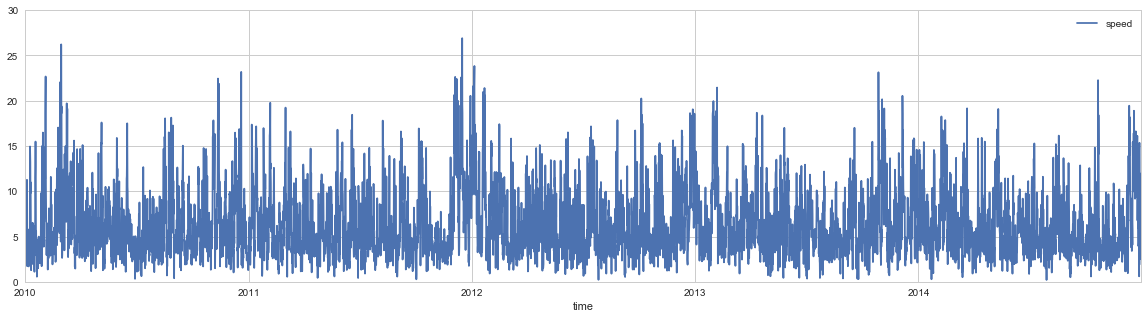

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

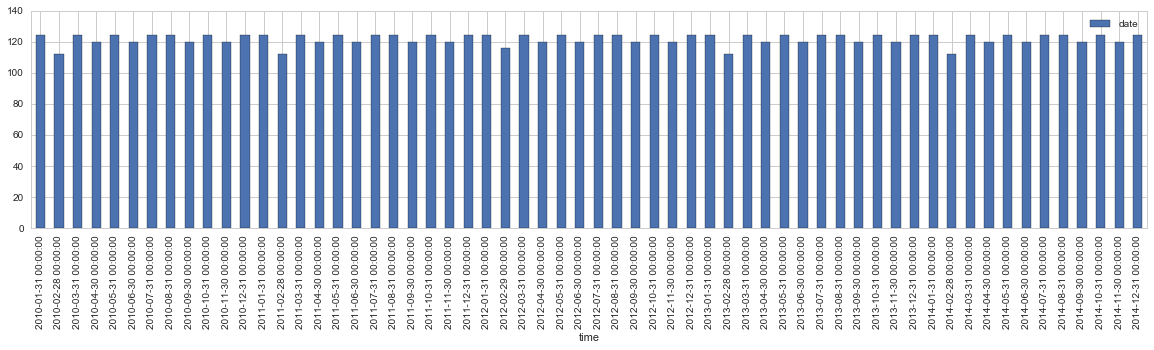

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


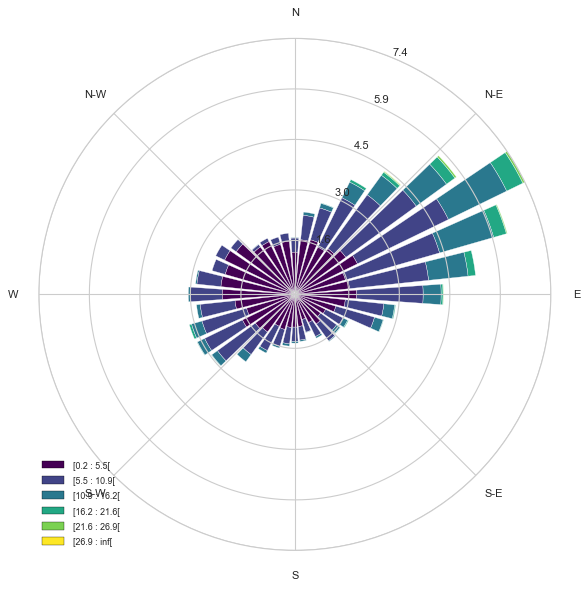

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASEAAADPCAYAAAC6JGddAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVnX6//EX260sIrikJi64K+6amBr2Vcky0xIIhNAR
Sm1swS0UU1EYUVFbDBnHbDIdc8sWJtMsFxpQA4xUyB0ZyRUQ2QQkzu8Pf9wjsSM354b7ej4ePIT7
vs85b052eZbP+VxGiqIoCCGESozVDiCEMGxShIQQqpIiJIRQlRQhIYSqpAgJIVQlRUgIoSpTtQPo
QlxcnNoRhDBogwYNqvJndVaEioqKCAwM5Ny5c2g0GoKDg+nQoUOJz9y7d49p06bxt7/9jc6dO7N3
716+/PJLAPLz8/ntt9+IiooiJSWFGTNm0LFjRwAmT57MuHHjKtx+dXZCXYmLi9O7XJKpaiRT1VX3
IEBnReiHH36goKCAnTt3Eh8fz8qVKwkPD9e+f/r0aZYuXcrNmze1r02aNIlJkyYBsGzZMlxcXLC2
tiYhIYFp06bh4+Ojq7hCCJXo7JpQXFwcTz31FAD9+/fnzJkzJd4vKCggLCyMTp06lVr29OnTXLx4
EXd3dwDOnDnDkSNH8PLyIiAggOzsbF3FrlBRURFpaWnlfhUVFamSS4j6TGdHQtnZ2VhZWWl/NjEx
obCwEFPTB5us6DBy48aNzJo1S/tz3759cXNzo3fv3oSHhxMWFoa/v3+F29fFdaGMjAwOxlzD3NKq
1Hv3crJxfuJxbGxs6jzXo5JMVSOZdENnRcjKyoqcnBztz0VFRdoCVJHMzEySkpIYOnSo9jVnZ2es
ra213wcFBVW6Hl2cK6elpXEx3YIm1ral3svKvEP//t1o3rx5ucvr4zm8ZKoayVR11S2MOjsdGzhw
IJGRkQDEx8fTrVu3Ki0XExPDk08+WeI1X19fTp06BcCxY8dwcHCo3bBCCNXo7EjI2dmZqKgoPDw8
UBSFFStWEBERQW5urvZaT1mSkpKws7Mr8VpgYCBBQUGYmZnRokWLKh0JCSHqB50VIWNjY5YvX17i
tc6dO5f63NatW0v8/Oqrr5b6jIODAzt27KjdgEIIvSAjpoWoJ6ZOnaq9LFFQUICvry8ff/yx9n1v
b29+++23UstFRkayc+dOUlJSePnll6u8veHDh2vXe+nSpUdMXz4pQkLUE8OHDyc2NhZ4cPG3b9++
HD16FHgwuPf333+nR48epZZzcnKq8BKI2hrkYxtC6Nr8+fPZvXt3ra7Tzc2N0NDQct8fNmwYGzZs
wMfHh6NHj/J///d/fP3112RlZZGQkMCQIUOIiYnhvffew8TEhHbt2rF8+XIiIiK4fPkyHh4epKen
M3PmTNLS0nj66aeZNWsWCxYsYNy4cTg5OREZGcm+fftYuXJlrf5uFZEjISHqiV69enH58mUURSEm
JoaePXvy5JNPEh0dzc8//8yIESNYvHgxH330Edu2baNVq1bax6CK5ebmEhoayo4dO/jpp584e/as
Sr/N/8iRkBA1EBoaWuFRiy4YGxvTo0cPIiMjadmyJWZmZjg5OXHkyBHOnj2Ll5cXixcvxs/PD4C8
vDyGDRtW4pnNHj160KRJEwD69OlDUlJSiW2oMeW8HAkJUY8MHz6cjRs3ah+JGjRoEImJiRQVFWFr
a0vr1q3ZsGEDW7duZebMmSUG/QJcunSJnJwcCgsLOXXqFF27dkWj0XD79m0AEhMT6/x3kiIkRD0y
bNgw4uLiGDlyJAAajYYmTZowZMgQjI2NWbRoEdOnT8fDw4Pt27eXGiTctGlTZs+ejYeHB2PHjqVL
ly64ubnx6aef8pe//KXEA+V1RU7HhKhH2rZty7lz5wC0BWPDhg3a90eMGMGIESNKLFM8MwXAN998
U2qdffr0ISIiotTrUVFRQOmxfLVNjoSEEKqSIiSEUJUUISGEqqQICSFUJUVICKEquTsmRA0UFRVx
586dWl2nra0txsaGd1wgRUiIGrhz5w5bvonF0sq6VtaXk53J1AmDK5yZE+DEiRP4+fnRpUsXMjMz
MTc3Z8qUKeV2n7l27Rpnz55l1KhRtZJTF/Sq5Q/ASy+9pJ2b2s7OjpCQEJKTk1mwYAFGRkZ07dqV
pUuXGuS/GEK/WFpZlznVr64NHTqU9957j7i4OHr06IG3tzf29vb07Nmz1GePHz/O5cuXDbMI1aTl
T35+PoqilBocFRISgp+fH46OjixZsoQff/wRZ2dnXUUXot6wtLTE3d2dffv2sW3bNm7cuMGtW7cY
NWoUb731Fv/4xz/Iy8tjwIABNGnShI8++ghFUcjJyWHt2rXY29ur/SvoV8ufs2fPcu/ePXx8fJgy
ZQrx8fEA2mkK4MHcKNHR0bqKLUS907x5cxITE+nfvz+bN29mz5497NixAxMTE6ZPn8748eMZPXo0
Fy5cIDQ0lK1bt/LMM8+wf/9+taMDetbyp3Hjxvj6+uLm5saVK1d47bXX2L9/P4qiYGRkBDyo/FlZ
WZVuX1ctf27cyCQr+16p97Iy73D06HWaNm1a7vLW1tZ62aJFMlXNw5kq+rtQEznZd4mPz620ZdT5
8+dJT0/XZomLi+PEiRO0bt2aQ4cOsW/fPszNzcnLyyMuLo4rV65w48YN4uLiyM7OZt68eTRu3Jj0
9HS6deumF/tZr1r+2Nvb06FDB4yMjLC3t8fGxobbt2+XuP6Tk5Ojbf9TEd21/Dlf5nWA60oBZ2/k
0/wPizKXzcnOpF/7TEaPHl3ruR6FPraNqQ+ZKvq7UBNZmeaVtowCKCws5OTJkwwaNIi4uDi6d+9O
YGAgrq6u3Lp1i/nz55OcnMyzzz7LwIEDuXr1KoWFhQwaNIg33niDgwcPYmVlhb+/P23atNHJftab
NtADBw7k8OHDjBs3rsotf/bs2cP58+cJDAzk5s2bZGdn07JlS3r16sWJEydwdHQkMjKy1PQE+sLC
qkklfylz6yyL0L2c7ExV1nX8+HG8vb3JycnBwsKCN998E3t7e+bOnUt8fDwajYYOHTpw69YtunXr
Rnh4OA4ODkyYMAEvLy/Mzc1p0aIFt27dqrX8j0KvWv64urqycOFCJk+ejJGREStWrMDU1BR/f38W
L17MunXr6NSpE2PHjtVVbCGqxNbWlqkTBtf6Oivj6OjIsWPHgNJHZ2U9Id+qVSsOHDgAwPPPP19L
SWuXXrX80Wg0rF27ttRn7O3t2bZtW+2HFKKGjI2NKz11ElUjg22EEKqSIiSEUJUUISGEqqQICSFU
JUVICKEqKUJCCFVJERJCqEqKkBBCVVKEhBCqkiIkhFCVFCEhhKqkCAkhVCVFSAihKilCQghVSRES
QqhKZ0WoqKiIJUuW4O7ujre3N8nJyaU+c+/ePTw8PLh06RIA9+/fZ/78+Xh6euLq6sqPP/4IQGJi
Ik899RTe3t54e3uzb98+XcUWQtQxvWr5880332BjY0NoaCgZGRm8+OKLjB49moSEBKZNm4aPj4+u
4gohVKJXLX+effZZ3n77bQAURcHExASAM2fOcOTIEby8vAgICCA7O1tXsYUQdUyvWv5YWlpql33r
rbfw8/MDoG/fvri5udG7d2/Cw8MJCwvD39+/wu3Xdcuf27duYWKiofCPspfNyb5Ll2bS8qeqJFPV
6GOm6tKrlj8A169fZ9asWXh6evLCCy8ADybNL27z4+zsTFBQUKXrqeuWP0ZKASamGh5r9XiZy2Zl
mgO5et/KRh9IpqrRx0xQ/cKos9OxgQMHEhkZCVDllj+pqan4+Pgwf/58XF1dta/7+vpy6tQpAI4d
O4aDg4NuQgsh6pxetfz5+9//TmZmJhs2bGDDhg0AbNq0icDAQIKCgjAzM6NFixZVOhISQtQPetXy
59133+Xdd98

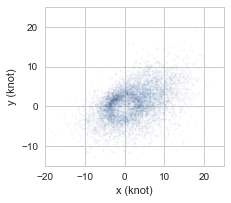

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAAB6CAYAAAD6WhzgAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEQFJREFUeJzt3X1QVNX/B/D3AqLEKqAm+svQEJFB5cEHkCEkddSMSFAb
n9BG04xqgqyUkicFE59qzPEBJUalNPsSWKPpGJZQKiSITSo/ZTUxE1hEQFZAYPfz+8MfO+6X3cvu
wu6yy+c1w4x79tx7Pxf87D333LPniIiIwBhTy8rUATDWnXGCMCaAE4QxAZwgjAngBGFMACcIYwLM
NkFaWlqwYcMG+Pv7w9/fH1u2bIFcLu+y+gAgk8kQGhqK2tpajXXi4+MxatQolZ8NGzZorF9aWorF
ixfD29sbISEhyMvL6/hkO/Dmm2+2i+Grr77SWL+wsBDh4eHw8vLC3Llz8ddffynfO336ND755BOd
jt/a2opt27bhxRdfhI+PD1asWIFbt26prXv8+HHMmTNH475u3LiBMWPGoKCgQKcYDIbMVEpKCk2f
Pp2Ki4vp3LlzFBgYSLt27eqy+kRESUlJtHfvXsE6CxYsoN27d5NUKlX+1NfXq63b2NhIkydPpri4
OJJIJLRr1y4aO3Ys3b59u+MTFhAUFETZ2dkqMTQ0NKitW1FRQb6+vrRjxw6SSCSUmJhI/v7+VFdX
p6wzd+5cKigo0Pr4X3zxBQUHB9OFCxfo1q1b9MEHH9DUqVOppaVFpd7vv/9O3t7eFB4ernY/ra2t
NGfOHHJ3d6f8/Hytj29IZpkgTU1N5O3tTTk5OcqyrKwsCggIILlc3un6RERSqZR8fHyotrZWMBY/
Pz/Kzc3VKu7s7GwKCAig5uZmZVlERASlpKRotb069fX15O7uThKJRKv6O3fupLCwMOVrhUJB06ZN
o4yMDJU4IyIitI5h+/btdPr0aeXrkpIScnd3pzt37ijLUlJSaPTo0fTqq69qTJA9e/bQ4sWLu1WC
mGUTq6SkBI2NjfDz81OWTZgwAdXV1bhz506n6wPA0aNH4evrCwcHB41xVFVVoba2Fi+88IJWcV+6
dAm+vr7o1auXsmzixIkoLi7Want1JBIJbGxs4OLiolX94uJiTJw4UflaJBJh/PjxKjFMmTIFxcXF
uH79ulb7XL16NaZPnw4AqKurw6FDhzB8+HAMGTJEWSc/Px8HDx7EjBkz1O6jtLQUBw8exPr167U6
prGYZYJUVlbCzs4Offv2VZY9++yzAICKiopO1weAs2fPIigoSDAOiUQCkUiE/fv3Izg4GK+88grS
09OhUCjU1pdKpRg0aJBK2cCBA1FZWSl4nI5iEIvFiImJwYsvvojZs2cjOztbY31tYnBwcMDYsWOR
m5urUyxpaWnw8/PD8ePHsX79etjY2Cjfy87Oxvjx49VuJ5fLERMTg6ioKAwePFinYxqaWSZIY2Mj
evfurVJma2sLAGhubu50fblcjmvXrsHNzU0wjlu3bsHKygouLi7Yt28fli9fjl27diEtLU2nuNXF
oK2bN2+iqakJAQEBSEtLQ1hYGOLi4nDixIlOxeDm5oYrV67oFMvMmTORlZWF8PBwREZG4ubNm1pt
l5aWBrFYjPnz5+t0PGOw6bhK99OnT592f9C213Z2dp2uX1tbC7lcDicnJ2XZihUrUFRUpHx94sQJ
LFq0CCEhIXB0dAQAjBo1CnV1dThw4ADeeustrePo06eP2vMMCQnBvXv3lK/VNcU++ugjvP3228qm
oIeHB/755x9kZGQgJCRE7xgcHR019kRp8vzzzwMAEhMTUVRUhMzMTKxdu1ZwG4lEgvT0dGRmZkIk
Eul0PGMwywQZPHgwGhoaIJPJIBaLATy5HwAAZ2fnTtdv+0M93VTauHEjmpqalK8HDRoEkUikTI42
bm5uuH//PuRyOaytrVXec3Z2Vh63TVVVldoYAGDfvn1obW1V+14ba2vrdvdJI0aMwNmzZ9XW1zYG
uVwOK6uOGxgKhQK//vorxowZo9yHSCTCiBEjUFNT0+H2p06dQn19PV577TWV8pUrVyIsLEywy9wY
zLKJ5eHhATs7O5VP9MLCQgwcOFDtzaqu9Z2cnGBjY6PyB3Z2dsawYcOUPzY2Nti4cSOWLVumsu2V
K1cwfPjwdskBAL6+viguLlb5T19YWAhfX1+15/ncc8+pHFOd9957D+vWrVMpu3r1KlxdXdXW9/X1
RWFhofI1ESk7D55WU1OjvE8TYmVlhQ0bNiArK0tZJpfLUVJS0mETFQAiIiJw8uRJHDt2DMeOHcOR
I0cAAMnJyYiKiupwe4MzdTeavpKSkmjq1KlUWFhI58+fp8DAQJVnFjU1NVRTU6N1/f82b948Sk1N
FYwhPz+fPDw8KDU1lcrKyig7O5t8fHzohx9+IKIn/fpSqZQaGxuJiEgmk1FgYCDFxMSQRCKh3bt3
k5eXl0p3qK6ys7PJ09OTMjMzqaysjA4cOECjR4+mixcvEhHR48ePSSqV0uPHj4mIqLy8nLy9vWn7
9u0kkUho/fr1NGnSJHr48KHKfsPDwyk9PZ2Injy/kUql1NraqjaG/fv307hx4+jnn38miURCMTEx
FBgY2G6fRERffvmlxm5eoie/o+7UzSsiMvwXpp7+5O4qzc3NOHjwIPLz89GrVy9MnjwZCxYsUDYL
kpKSAABxcXFa1f9vWVlZKC0t7bAN/ccffyArKwvl5eVwcnJCaGgopk2bBuBJ0yUqKgqrVq1CcHAw
AOD27dtIT09HWVkZnJ2dERERAS8vr079LnJycnDy5Encv38fzs7OeP3115VdudeuXUNycjJiY2Ph
6ekJ4MlV7tChQ6isrISLiwuWLVumcsVpaGjAqlWrsGXLFgwZMgS5ublITU3Fjh071F5VFAoFjh8/
jjNnzqC2thbu7u544403MHTo0HZ1MzMzUVxcjI0bN6o9l6amJixfvlwlXmPQ1MNmlCtIYWGhMQ7T
pSoqKsjb25uqqqo6tR9zPPdvv/2Wli5dqlK2cuVKnX4X5nTeQrGa5T2IMTg7OyM8PBxHjx41dShG
RUQ4cuQIIiMjlWWXLl2ClZUVBg4caMLITIMTRMDq1avx008/CQ5WtDSnTp2Cu7s7Jk2apCzz8vLC
nj17TBiV6ZhlN6+x9O3bV+MDN0s1a9YszJo1S6Xs6SfiPQ1fQRgTwAnCmABOEMYEcIIwJoAThDEB
nCCMCdCq/y41NRW//PILWlpasHDhQvj5+SEmJgYikQgjR45EQkKCViM/GTM3Hf6vLigoQHFxMY4c
OYKMjAxUVFRg06ZNiI6OxuHDh0FEOHPmjDFiZczoOhysuH37dohEIpSWlkImk2HNmjV45513kJeX
B5FIhJycHJw7dw4JCQka92GIwYqMdSVNgxU7bGLV1NTg3r172Lt3L+7evYvIyEgQkfJLRfb29qiv
r9c7AEtXVFTUI8/dnM5b6AO8wwRxdHSEq6srbG1t4erqit69e6tMdPDo0SP069evayJlrJvp8B5k
/Pjx+O2330BEqKysRGNjIwICApQz3+Xl5WHChAkGD5QxU+jwCjJlyhRcvHgR8+bNAxEhPj4eQ4cO
RVxcHD7//HO4urpi5syZxoiVMaPTqpt3zZo17cq+/vrrLg+Gse6GH14wJoAThDEBnCCMCeAEYUwA
JwhjAjhBGBPACcKYAE4QxgRwgjAmgBOEMQGcIIwJ4ARhTAAnCGMCOEEYE6BVglRXVyM4OBg3b95E
WVkZFi5ciEWLFiEhIUHjkseMWYIOE6SlpQXx8fHKVVB5RhPWk3SYIJs3b8aCBQuUi89fvXoVfn5+
AIDJkyfj/Pnzho2QMRMS/EZhVlYW+vfvj6CgIOzbtw8A9JrRBOjZU//01HO3hPMWTJDvv/8eIpEI
Fy5cQElJCda

Wall time: 8.2 s


## 2.3 Overview by Month

In [41]:
%%time
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        title = 'Month: %s' % (month)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXdYXGX2xz/TmaHOAAOhBwgQSK+mmWKaiZo1rqv+LLuu
ruu6Grtxd12zxhp1bdFV196NWVuiMd3EaHoxhd7LAMMAQ5ne7u8PnEkQSCAZCFE+z8PzwNx733vn
cr/3Pe95zzmvSBAEgQEGGOCcQHy2L2CAAQboPgOCHWCAc4gBwQ4wwDnEgGAHGOAcYkCwAwxwDjEg
2AEGOIcYEOyvgIGZu18OA4LtA2bNmkV6ejpPPPFEp9t1Oh3p6emkp6fT2Njo13Nv3ryZZcuW+f5e
uXIlo0eP9us5TCYTM2fOZP369X5td4CODAi2jxCJRGzatKnTbRs2bOi1877zzjvo9fpea99kMnHL
LbdQXV3da+cY4DgDgu0jRo8eTVVVFTk5OR22rV+/nvT09LNwVWfG3r17ufzyy8nLyzvbl/KrYUCw
fcTQoUOJj4/v0JtWV1dz9OhR5s+f3+GYTZs2cdlllzFq1CimT5/Oc889h8vl8m2fNWsWr732GsuW
LWPChAmMGTOGpUuXYjKZALj22mvZu3cv27ZtIz09naqqKt+x69atY968eQwfPpzFixdz8OBB37aq
qirS09NZuXLlSb/TX//6V9LS0nj99ddP654M0HMGBNuHzJ07t4NZvGHDBkaOHEl0dHS7z1etWsWt
t97KiBEjePHFF7nmmmt48803uf/++9vt9+qrr9LS0sIzzzzDHXfcwddff83LL78MwLJly8jMzGTM
mDGsWrUKrVYLgNVq5dlnn2XJkiU8//zzWK1WbrvtNt/LQKvVsmrVKi6//PKTfp8PPviA559/Ho1G
c0b3ZYDuIz3bF/BrYv78+bzxxhsUFxeTkpICtJnDF154Ybv93G43zz33HAsXLvQ5jKZOnUpwcDDL
li3jxhtvJCMjA4Do6GieeeYZRCIRU6dOZfv27bz++utMmDCB6dOnExQUhEql4q677uLdd98F2rzG
Tz31FKNGjQLA5XJx2223UVRUREZGBnK53LftZKSlpfnt3gzQPQZ62D5k+PDhDBo0iI0bNwJQU1PD
kSNHmDdvXrv9SkpKaGxs7GAmL1y4EID9+/e3a1MkEvn+joyMBNp619bW1k6vQyKRMGLECN/fsbGx
AF3uP0D/YUCwfYhIJGpnFm/YsIERI0YwaNCgdvs1NzcDEB4e3u7z4OBg5HK5b4wKoFQqO5xDIpEw
depUHn/88U6vQ6FQIBYf/9d7f/d4PKf5zQboKwYE28fMnTuX7Oxsqqqq2LBhQwdzGCAsLAyAhoaG
dp+3tLTgcDh820/G/fffz65du2hqavLPhQ/QLxgQbB8zZswYIiMj+fjjjzl8+HAHcxhg8ODBqNXq
DoEI69at87VxKoKCgnj44YcpKytr51ke4NxmwOnUx4jFYubMmcPbb7/tG9P+HIlEwq233srDDz9M
aGgoF1xwAfn5+axcuZL58+d329kzdepUIiMjOXToEEqlErvd3q3jHA4HOTk5REdHd/BeD3B2Gehh
zwJz587F6XR2Ovfq5ZprruHRRx9lz5493HzzzXzwwQdcf/31PP300z061/Lly7FardTX11NUVNSt
Y+rq6rjiiitYvXp1j841QO8jGqjp9MuiqqqK6667jq1bt/o++/7777nhhhvYsmULcXFxZ/HqBjhT
BgQ7wADnEAMm8QADnEMMCHaAAc4hBgQ7wADnEAPTOr8APB4PbrfbV1lCEATf7yKRqN2PRCJpF8p4
Nvjyyy/573//C8D555/P0qVL222vqqryZR0FBwezYsUKX/jkr50Bp1M/RhAEnE4nDocDp9Pp+7Hb
7b7PXC5Xj0MKJRIJMpkMmUyGXC5HLpf7/pbJZCgUCqTS3nmXW61Wpk+fzjfffENoaChXXXUVd955
J5MnT/btc++99zJq1Ciuvvpq3nvvPQ4fPtzj6axfKgM9bD9BEAQcDgcWiwWz2YzZbMZiseDxeBCL
xb4fqVSKVCpFqVQSGhqKQqHwic4rMrFYjNvt5scff2TUqFGIRCIEQcDlcuFwOLDb7T7Re8/pFb7H
40EQBGQyGSqVypfto1Kp/CJit9uNx+PBZrMRFBSE2+1GoVC028fj8WA2mwGw2WwEBASc8Xl/KQz0
sGcJl8tFa2trB3FKpVJkMhlKpZLg4GBCQ0ORyWQ9bv9EwUokkm4fJwgCVquV5uZmzGYzNpsNp9OJ
x+NpJ+LAwECCgoJOy7x+7733eOqpp1AqlYwfP56VK1e2a6eiooIrr7wSiUSCy+Xi448/JjExscfn
+SUy0MP2IXa7naamJoxGI2az2WeaqlQqIiMjCQ0N7ZG4egORSOTrUU/E4XBgNBppaWnBYDBQXV2N
SCQiNDSUsLCwbl97Xl4en376Kd9++y3BwcHcc889vPHGG9x4442+fZYuXcry5cuZPXs2GzZs4NZb
b2XNmjVnfezdHxgQbC8iCAIWiwWj0UhTUxN2ux2ZTEZQUBCxsbEEBwef7UvsNnK5nKioKKKiooA2
s7WxsZGGhgYqKipwu90EBgai0Wh8pnpnfP/990yaNMmXOrh48WI+/PBDn2AbGxspKSlh9uzZAMyb
N49ly5ZhNBoHKlswIFi/IwgCZrOZ+vp6mpqa8Hg8KBQKwsLCiIqKOi3ztj8iFouJiIggIiICALPZ
TF1dHbW1tVRWVqJQKFCr1URGRiKXy33HZWRksGLFCm699VZUKhVbt24lKyvLt12tVqNQKNizZw8T
J07kwIEDqFQq1Gp1n3/H/siAYP2E2+3GaDSi1+ux2+0oFAqio6PRarXtksV/qQQGBjJ48GCgzfTX
6/U0NDRQW1tLaGgoWq2W4OBgpk6dSk5ODosXL0YulzNs2DBuuukm/vGPfzBr1iwuuOACXnzxRR5+
+GFsNhuBgYG88MILA+bwTww4nc4Qm81GXV0d9fX1iMViwsLCiI2NPes96ek6nfyNyWRCp9NhNpuR
SqVERUURHh7ea9NGv3QG7tppIAgCTU1N6PV6zGYzAQEBJCYmotFoBnqCnxEUFER6ejput5uamhpq
a2vR6XRoNBq0Wm0H59YAJ2egh+0BgiDQ2NiITqfD7XYTFBREfHx8v5wn7C89bGcYjUaqq6t9c7Fx
cXEEBgae7cs6JxjoYbuBIAi0tLRQWVmJ0+lErVYTHx/f74RwrqBWq1Gr1VitVsrLy8nLy/MNJfrj
y68/MSDYU2AymaisrMRqtRIWFkZiYuKAUP2EUqkkIyMDq9VKaWkp2dnZhIeHExMT086zPMBxBgTb
BVarlaqqKlpbWwkODmb48OFn3ZH0S0WpVJKZmYnJZKKsrIxjx46h1WqJjo4ecE79jIG78TNcLheV
lZU0NjaiUqkYOnRoh9q/A/QOQUFBDBs2jMbGRqqqqjAYDAwaNIioqKgBZ95PDAj2BIxGI+Xl5YjF
YoYMGUJISMjZvqRfJRqNBo1GQ3V1NTU1NTQ2NpKcnDwwvmVAsEBbr1peXk5zczORkZHExsb+KoId
+jsxMTFotVqKiorIyckhJibmV9/b/uoFazQaKSsrQyaTDZi/fuKjjz7i448/9v1dXV3NjBkzeOqp
pzrs641iuu222zptSyqVkpGRQX19vW+o8mvubX+187An9qpRUVHExMT8ot7c/WUetrS0lBtuuIGP
PvrIlzgAbcuOPP7446xbt44bb7yxS8GeiNvtpqioCLPZ/KvtbfuN3eddRHj79u3tPp81a1a7hYid
TiejR4+msbHR99m1117LZZdd5vu7ubmZ0aNH43A4Oj2X0Wjk2LFjWCwWhg4dSmxs7Dn/j/dWp/Am
p3ur/Ht/d7l

Wall time: 18.6 s


In [42]:
df.describe()

lat     lon            x            y        speed  \
count  7.304000e+03  7304.0  7304.000000  7304.000000  7304.000000   
mean   4.900000e+01     9.0     1.766120     0.926348     6.310796   
std    1.250641e-12     0.0     5.728804     4.112337     3.725153   
min    4.900000e+01     9.0   -18.672756   -14.688132     0.204959   
25%    4.900000e+01     9.0    -2.683366    -1.884292     3.622733   
50%    4.900000e+01     9.0     1.478355     1.130566     5.268912   
75%    4.900000e+01     9.0     5.533056     3.400770     8.271557   
max    4.900000e+01     9.0    22.218720    20.209750    26.889014   

               dir          date         HrMn        month  dir_windrose  
count  7304.000000  7.304000e+03  7304.000000  7304.000000   7304.000000  
mean    147.068262  2.012067e+07   900.000000     6.523549    154.771825  
std     110.104352  1.414344e+04   670.866319     3.448769    105.041868  
min       0.016794  2.010010e+07     0.000000     1.000000      0.036594  
25%      40.911784  2.011040e+07   450.000000     4.000000     62.099300  
50%     139.217153  2.012070e+07   900.000000     7.000000    121.039737  
75%     227.239875  2.013100e+07  1350.000000    10.000000    251.949099  
max     359.936450  2.014123e+07  1800.000000    12.000000    359.884492

# 3. Create input data and configuration

In [43]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [44]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14]


In [45]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [46]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [47]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


1.1
Wall time: 5.82 s


In [48]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 1.1 841
[  6.58456636e-08   9.94466766e-07   6.82139773e-06   2.14274306e-05
   3.40611276e-05]


In [49]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUI/ddL/ip0rulbvX73epuaTw473k4DhxnDNswm5yQ
LJABjw03ZwNmk5CQEPAmGUjs+DpjzySA93CxGcjDcK9DbibrXR5DOGEzmcBwzSEejxm449gTu59S
q7sltd7Pkqpq/5B/1aVSlVRVUqmldn3OmeN2l371q5aqPvp83xTP8zxMmDBh4oCC3u8LMGHChAkj
YZKcCRMmDjRMkjNhwsSBhklyJkyYONAwSc6ECRMHGibJmTBh4kDDJDkTJkwcaJgkZ8KEiQMNk+RM
mDBxoGGSnAkTJg40TJIzYcLEgYZJciZMmDjQMEnOhAkTBxomyZkwYeJAwyQ5EyZMHGiYJGfChIkD
DZPkTJgwcaBhkpwJEyYONEySM2HCxIGGSXImTJg40DBJzoQJEwcaJsmZMGHiQMMkORMmTBxomCRn
woSJAw2T5EyYMHGgYd3vCzCx/+B5HgzDoFKpwGKxwGazgaZpUBS135dmwkTLoHie5/f7IkzsH0ql
ElKpFPr7+1EulwEA4XAYQ0ND6O/vB03TJumZ6GmYSu51DJZlUSgUEI1G4Xa7UalUYLPZwPM8eJ4H
y7KoVCpgGAYURcFisZikZ6LnYJLc6xA8z6NSqYBlWVAUBZZlsby8DJZlYbVawXEc8vk8HA4HrNa9
W4SQXqlUAk3TsFgssFgssFqtJumZ6FqY5urrDBzHoVwug3zsW1tbiMfj8Pl8sNvtYBgG29vboCgK
5XIZVqsVfX19cLlc6Ovrg8ViqTkfOQ9FUQLZWa3WuteZMLFfMJXc6wTE/GRZFgBQqVQQCoXAcRxs
Nhv6+/vBMAycTidsNhu8Xi/cbjdKpRLy+TxSqRR2dnYE0iPEJyazSqUCnudRKpVM0jPRNTBJ7nUA
juNQqVTAcRwoikImk8Hm5iaGh4cxMDCAjY2NmtdTFAWe50FRFJxOJ5xOJ4aHh8HzPIrFIgqFApLJ
JLa3t2Gz2QTCa0R6NF3NViqXyxgYGDBJz0THYJLcAQfxo5Fgwvb2NtLpNObm5gSlptZjQVGUQGZi
0svn80gmk9ja2oLdbq8xbwm58TyPQqGASCQiBDDIf02lZ8JImCR3QCE1TxmGQTAYhN1uRyAQEAIK
rQQLxKQHVBUjUXqJRAJbW1twOBwC4ZE1RClKlZ5JeiaMgElyBxBS8zSRSGB7exvj4+MYHh6uIzap
kiMkpBU0TQv+upGREYH08vk84vE4isUiACAWiwnkKFZ6JumZMAImyR0wiM1TjuOwtbWFQqGAxcVF
OJ3OutcbmfYhJj0AyOVyiEQiAIDd3V2USiU4nU5B6TmdTpP0TLQdJskdEPA8j52dHfT19cHhcKBY
LCIYDMLtdiMQCAjkobQWMJbwgCrp0TSN0dFRAFXFWSgUkM/nEYvFBNIjPj21pGe3280cPROKMEnu
AIDkviUSCVitVmQyGUSjUUxPT8Pr9TZcK0cOes3VZpDuRdM03G433G43gL0KDFKFwTCMYNYSpUfO
ISU9hmHAsiyGhoZgs9lM0jMhwCS5HgepXCAg5mAgEIDdbld1jm7JB7dYLPB4PPB4PAD2SC+fzyMS
iaBcLtcpPUJmJODhcrlQLBZrKjJM0nt9wyS5HoW0NCubzaJQKKC/vx9zc3OqH2ql13UD8TUivZ2d
HVQqFYH0CNFLlV65XDZJ73UOk+R6EOLgAgDs7OwgkUjA6XRicHCw5Qe4WwlASnqVSkUgvWw2K6TM
EKXncDhM0jNhklwvQZr7Vi6XEQqFQFEUAoEAwuGw5nMa5X/rBKxWK/r7+9Hf3w+Hw4FCoQCPxyMk
J7MsK/jz+vr6agIUYtIjgQxCfCbpHSyYJNcjkOa+pdNpbG5uYnR0FKOjozVJtu1ALxIfTdMC6QFV
pZfP54UyNLHKk5Iex3FCAEdMelarFVar1SS9HoZJcj0AlmWFhpY8z2NrawuZTAbz8/NCDhqgT5WJ
61TFv+s1yP3dVqsVAwMDGBgYAFBVvsS8TSaT4DiuRumJFZyY9MrlMjKZDCYmJkzS60GYJNfFkAYX
SO6b0+nEoUOHzIRYCZoRj81mg81mqyE9ovTi8Th4nq9ReoT0iCIk5i1FUabS6yGYJNelEJunABCP
x7Gzs4OJiQkMDQ21Lb9N7KNq5Ty9CNJSyuv1guf5GqUXj8cBAC6XS2gkKla8YqVnkl53wyS5LkQi
kYDFYoHD4QDHcQiHwygWi4qlWQSvF3IyAhRFwW63w26315BePp9HJpNBqVTC6uqqrNIDTNLrZpgk
10Ug5mksFsPAwABYlkUwGER/f3/T0qxWcBDIsd3XLyY9m82GeDyOiYkJ5PN55HI5xGIx0DQtEJ7L
5VIkPQA18zEsFotJeh2ESXJdAnHuG4me5nI5VaVZBO0iq14lPaOIg+d5oUbWbrdjcHBQGONIcvRI
nzxxIEOs4EzS2z+YJLfPkOa+sSyLXC4HmqY1lWYB+smpV0ltP0FRFBwOBxwOB4aGhmpIL5PJCKQn
bhWvRHrRaBSDg4Nwu91ChxWT9NoHk+T2EUptya1WKwYHBzURnAnjIE2xkYMc6ZVKJRQKBaTTaWE+
hti8JaRXLBaFyC3DMABQNx/DJD39MElunyAtzdre3kYymcTs7CzS6bSum7pVJSf9r4kq9L6nZD6G
mPTkhgKJo+jkcyfqXjrz1iQ97TBJrsOQ5r6Vy2UEg0FYrVYcOnRIaJV0UM1Oo65PjdpqBe2oB1Ya
CsSyrDAfQ6z0xGRmkp5+mCTXQUjN01QqhXA4jLGxMYyMjAg3aitk1el1WtCrD6IRBCqej5FOpzE5
OQme5xWHApmkpx8myXUI4r5vPM8jHA4jl8thYWFBGARD0OkAgvSBoChKMJ9MGA9x9FbtUCAyH8Mk
veYwSc5gKJVmuVwuBAIB2dKsVshKLzlxHAeGYWCz2XSt328YqUSNNoXlzq9mKJDD4ahRelLSq1Qq
YBgG4XAYMzMzsNlsr0vSM0nOQIgL64Hq8JZIJILJyUkMDQ0prtNLVq2YucFgUFADFosFVqtVeJB6
5YHoleuUQg2JSocCiUmv2VAg4vcjaS5ipWez2WrI8SDCJDkDQHLfXnzxRRw6dAgAEA6HwTAM/H4/
HA5Hw/WdDCCk02lUKhUMDg5ieHgYLMsiGo2iWCxie3sblUpFeLikpUyvF+yHkmsGOdKTGwrkcrnq
IrdArdI76KRnklybIS2sz+Vy2N7exsDAAGZnZ1WVZnXCJ0eme6VSKVitVqHon9TM0jSN8fFx2aJ1
cYJrr5q3Bw3SoUBi0gOAlZUVoVW8dCgQIE96RNH3OumZJNdGSHPfSHH9zMyM0N5HLYwkOZK2Qqoq
VlZW6taR/xe3JxIXrYtLmcRK7yC2f+pGJdcMhPRcLheSyST8fr8wCS0SiTSchAbs3cvSVvG9SHom
ybUBxDytVCpC/7FQKASe5+Hz+YSZBGphpLlKqipGRkZqOgpL91e6Lmn9pjTB1Waz1Sg9o5oKSEEi
lL0II0mUnFvLUCDxJDRpIKNUKoGiqLqKjG6GSXItQqk0a3h4GJVKRdcNoPeGb0SOPM8jEokgkUhg
dnZWM/Eq7SdNcCUPjtgZTkivl779xTCahABjmwvInVuO9EgDUUJ6YqUnDUCJZ97G43EMDg7C5XIJ
ZNlNxGeSXAuQ5r5tb28jnU5jbm4Obrd7XyoX5NaRgTcAhKqKZvvpvW4lZzgxkYBqvzzpjIVuRi+n
p5Av32awWCx18zHIZ0cCUOIcPTHp5XI59PX1gaZphMNhTE5OYnBw0LC/SStMktMBae5bqVRCMBiE
zWZDIBAQSGS

In [50]:
kde_cdf = cdf_from_pdf(kde_result)
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

In [51]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(50)) 

Wall time: 9.8 s


In [52]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARQAAADXCAYAAADbe67XAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGfxJREFUeJzt3XtUlHX+B/A3gqgwCBrgsVBEtGIxFVwtdldNdklTdJHL
ItCQwbrmelkRD4gSosjNvFRkJqarZ1BDPe2q6VqpqJ3ieMGF4mIcRmQFN0IQZYDD9fn94c/JWS8M
w5fmAd+vv5h5nnl4N0fezTzznedjIkmSBCIiAfoYOwAR9R4sFCIShoVCRMKwUIhIGBYKEQnDQiEi
YcyMHYC6xtPTExUVFTr3WVhY4MUXX0RUVBTc3NyMlIyeRiZch9KzeXp6IjAwEL6+vgAASZLw448/
YsuWLSgqKsLp06ehUCiMnJKeFnzL0wtYWlrCzs4OdnZ2sLe3x9ixY5GSkoLa2lpcuHDB2PHoKcJC
6aXMzc0BAKamph3uW1JSAqVSCTc3N7zyyitYs2YNGhoatNt3796NKVOmwN3dHUlJSViyZAnS0tIA
AKtWrcKyZct0jufp6YmMjAwAQGtrK7Zu3QpPT0+4urriN7/5DRITE9HW1qZ9/MqVKxEQEIBJkybh
22+/RUtLCzZt2oTf/va3mDBhAsLDw3Ht2jUhzwt1LxZKL1RTU4PExETY2dnh17/+dYf7R0ZG4tln
n8WRI0ewY8cOZGdnIz09HQBw6NAhpKWlITo6GpmZmbh58ybOnTund5ZPPvkER44cQUpKCr744gtE
RUVh3759OHPmjHafzz//HCEhIdi7dy/c3NzwwQcf4Pz583jvvfdw8OBBODk5QalUoq6urvNPBv2i
WCi9QEpKCtzc3ODm5oZx48ZhypQpqK6uxt///ne9zp+Ul5fDxsYGzz77LMaNG4ft27djzpw5AIAD
Bw5g3rx5mDVrFkaPHo2UlBQMGDBA72yjRo1CcnIyJk2aBAcHB/j4+MDZ2RnFxcXafZycnODj4wMX
FxeYmJhgz549iI+Px8SJE+Hs7IzY2FgoFAocPXq0808O/aL4KU8vsHDhQsyZMwfNzc3Yv38/vvrq
KyxZsgSjR4/W6/FLly5FamoqPvvsM/zud7+Dl5cXXn/9dQCAWq1GWFiYdl+FQoEXXnhB72x/+MMf
cPHiRbz77rsoLS1FcXExbty4gddee027z7Bhw7Q//+c//0FzczPCwsJgYmKivb+pqYlve3oAFkov
MGjQIDg6OgIA1q5di5qaGixatAhHjx7F0KFDO3z8/PnzMWPGDJw+fRpff/01oqKi8PXXXyM5ORn9
+/dHe3u7zv73z88A0Pmjv6+1tVX784cffoi9e/fCz88Pr732GiIjIxEZGamzf//+/bU/3z+3snv3
bjzzzDM6+/HTKvnjW55eaO3atTA1NUV8fHyH+zY1NSExMREtLS0ICQnBxx9/jLi4OBw/fhwA8Pzz
zyMvL0+7f3NzM3744Qft7b59+6K+vl57u76+HjU1Ndrbu3btQnR0NFatWgUfHx84ODjg5s2beNxq
heHDh8PMzAw1NTVwdHSEo6Mjhg0bhvfff18nB8kTC6UXGjx4MCIjI3H27FmcOnXqifv269cPV65c
wfr161FcXAy1Wo2vvvoKY8eOBQD85S9/wcGDB3H48GFcu3YN69atQ1VVlfbxL730Ei5fvoxz587h
2rVriI2NRZ8+P/+zGjJkCM6dO4eysjIUFBTgb3/7G+7cuYPm5uZH5rG0tERQUBASExO1j4uPj0dW
Vpbeb+HIeFgovZS/vz/c3NyQlJSExsbGJ+773nvvoU+fPggODoa/vz/Mzc2xadMmAMDkyZMRFxeH
bdu2wdfXFwMGDICLi4v2sX/84x/h7e2NiIgIhISEwMXFBe7u7trtKSkpKC8vx+zZs7F48WI4ODjA
398fBQUFj80TFRWF6dOnY/Xq1ZgzZw6Ki4vxySef6JxrIXniSlnqNF9fX0ybNg1Lly41dhSSGZ6U
7eVqamq0JzofxcLCApaWlr9gIurNWCi9XHBwMEpLSx+7fcGCBVi5cuUvmIh6M77lISJheFKWiIRh
oRCRMCwUIhJGr5OyeXl52LRpE1QqFSIiInDr1i0AQEVFBcaNG4etW7fq7D937lztMmkHBwckJycL
jk1EctRhoezcuRNHjx7VfsP0fnncuXMHoaGhiImJ0dm/qakJkiRBpVJ1Q1wikrMO3/IMHz5cezGd
B6WlpeGNN96Avb29zv1Xr15FY2MjwsLCEBoaitzcXHFpiUjWOiyU6dOnw8xM94VMdXU1srOztdcx
fVD//v0RHh6OXbt2Yd26dVi5cqXOt0+JqPcyaGHbyZMn4e3t/cjLCzo5OcHR0REmJiZwcnKCjY0N
qqqqOvwafU5OjiFRiEiACRMmCDmOQYWSnZ2NRYsWPXLb4cOHUVxcjPj4eFRWVkKj0cDOzk6v44r6
jxIlJyeHmfQgx0yAPHPJNZMoBn1sXFpa+tA3P6OionDz5k34+/ujrq4OQUFBiIiIQFJS0kNvmYio
d9LrL93BwQEHDx7U3r5/8Z0Hbdy4Ufvz5s2bBUQj6tna2tqgVqt17isrK4OVlZVBx3N2dtZrioEx
8aUDUTdRq9VQxuyHhbXuJ6H4/MdOH6vhzk9QJQfj+eefF5Sue7BQiLqRhbU9FIOeM3aMXwyX3hOR
MCwUIhKGhUJEwrBQiEgYFgoRCcNCISJhWChEJAwLhYiEYaEQkTAsFCIShoVCRMKwUIhIGBYKEQnD
QiEiYfQqlLy8PCiVSgBAYWEhJk+eDKVSCaVSiRMnTujs297ejri4OAQGBkKpVKKsrEx8aiKSpU7P
5SkoKMBbb72FsLCwR+5/6tQpNDc3IzMzE7m5uUhJScH27dvFpiYiWer0XJ78/HycPXsWISEhWL16
NTQajc7+OTk5mDx5MgBg/PjxyM/PFxyZiOSqw1co06dPR3l5ufb22LFjERAQgDFjxmD79u3Ytm0b
oqOjtds1Go12DCkAmJqaorW1Va8LVctxlAYz6UeOmQDj5hL9dj8/Px91dXVCjylapy8B6eXlhYED
B2p/TkhI0NmuUChQX1+vvd3e3q73Ve/lOF6AmTomx0yA8XNZWVkZdP3YxxkzZky3XFPWqGM0wsPD
8d133wG4N5/H1dVVZ7u7uzvOnz8PAMjNzZX9RXWJSJxOv0KJj49HQkIC+vbtC1tbW+0rlKioKCxf
vhxeXl745ptvMG/ePEiShKSkJOGhiUieOj2Xx9XVFZ9++ulD+zw4l2f9+vWC4hFRT8KFbUQkDAuF
iIRhoRCRMCwUIhKGhUJEwrBQiEgYFgoRCcNCISJhWChEJAwLhYiEYaEQkTAsFCIShoVCRMJ0+vIF
RPTLk9rbUVpaKux4zs7OMDU1FXa8+1goRD1AY10V4tJvwcJa3eVjNdz5Cark4G65+JlehZKXl4dN
mzZBpVKhqKgICQkJMDU1hbm5OVJTU2Fra6uz/9y5c7XXlXVwcEBycrLw4ERPGwtreygGPWfsGE/U
6TEaiYmJeOedd+Di4oJPP/0UO3fuRExMjHb/pqYmSJIElUrVfamJSJY6PUZjy5YtcHFxAQC0tbWh
X79+OvtfvXoVjY2NCAsLQ2hoKHJzcwVHJiK56vQYDXt7ewDAlStXkJGRgX379uns379/f4SHhyMg
IADXr1/HggULcPLkSY7REIiZ9NebxmiI1F0jOQw6KXvixAls374d6enpGDx4sM42JycnODo6wsTE
BE5OTrCxsUFVVRWGDh3a4XHlNorB2GMYHoWZ9GfsXKLHaIj04EgOo47ROHLkCDIyMqBSqTBs2LCH
th8+fBgpKSkAgMrKSmg0GtjZ2XU9KRHJXqcKpa2tDYmJiaivr8fSpUuhVCrxwQcfALg3RuPmzZvw
9/dHXV0dgoK

In [53]:
# %%time
year_length = 5
gofs_bivariate = []
df_start_year, df_end_year = df_all_years.index.year[0], df_all_years.index.year[-1]
for start_year in arange(df_start_year, df_end_year-year_length):
    end_year = start_year+year_length-1
    df_previous = df_all_years[str(start_year):str(end_year)]
    speed_previous = array(list(zip(df_previous.x, df_previous.y)))
    kde2 = neighbors.KernelDensity(bandwidth=bandwidth, kernel=KDE_KERNEL).fit(speed_previous)
    kde_result2 = exp(kde2.score_samples(points))
    gofs_bivariate.append(goodness_of_fit_summary(kde_result2, kde_result))
gofs_bivariate=pd.DataFrame(gofs_bivariate)
gofs_bivariate.index = arange(df_start_year, df_end_year-year_length)

In [54]:
gofs_bivariate

Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1979    0.043024  0.045553  6.781498e-08    0.028342     0.224465  0.979026
1980    0.040902  0.041473  5.963950e-08    0.026579     0.210501  0.981554
1981    0.093173  0.042864  5.611314e-08    0.025781     0.204183  0.982645
1982    0.083689  0.037559  5.213954e-08    0.024851     0.196820  0.983874
1983    0.028332  0.037570  6.396881e-08    0.027526     0.218007  0.980215
1984    0.029534  0.040727  5.310876e-08    0.025081     0.198641  0.983574
1985    0.034310  0.038631  4.479363e-08    0.023034     0.182429  0.986146
1986    0.037137  0.041046  5.085796e-08    0.024544     0.194386  0.984270
1987    0.036222  0.034673  5.217893e-08    0.024861     0.196895  0.983862
1988    0.522951  0.038641  5.267379e-08    0.024978     0.197826  0.983709
1989    0.274387  0.036911  4.491534e-08    0.023065     0.182677  0.986108
1990    0.539064  0.053266  6.308705e-08    0.027336     0.216499  0.980488
1991    0.498639  0.055323  6.298174e-08    0.027313     0.216319  0.980521
1992    0.067398  0.047044  5.703388e-08    0.025992     0.205851  0.982360
1993    0.076337  0.037642  5.479700e-08    0.025477     0.201774  0.983052
1994    0.089621  0.043979  5.720394e-08    0.026030     0.206158  0.982308
1995    0.097161  0.038471  6.071011e-08    0.026816     0.212382  0.981223
1996    0.109786  0.050147  6.246227e-08    0.027200     0.215425  0.980681
1997    1.556444  0.076006  1.008009e-07    0.034554     0.273665  0.968824
1998    0.066788  0.081072  1.264617e-07    0.038703     0.306525  0.960887
1999    0.050471  0.053674  7.342926e-08    0.029492     0.233572  0.977289
2000    0.036913  0.044869  5.490070e-08    0.025501     0.201965  0.983020
2001    0.676349  0.028693  4.586242e-08    0.023307     0.184593  0.985815
2002    0.390745  0.021448  4.119555e-08    0.022090     0.174949  0.987259
2003    0.303370  0.033162  5.061287e-08    0.024485     0.193917  0.984346
2004    0.411514  0.043084  6.464939e-08    0.027672     0.219164  0.980005
2005    0.039394  0.036771  5.649962e-08    0.025869     0.204885  0.982525
2006    0.030625  0.031744  4.927556e-08    0.024159     0.191338  0.984760
2007    0.025204  0.027558  2.625276e-08    0.017634     0.139661  0.991880
2008    0.019740  0.020010  1.710496e-08    0.014234     0.112732  0.994710
2009    0.005040  0.010675  1.194264e-08    0.011894     0.094197  0.996306
2010    0.000000  0.000000  0.000000e+00    0.000000     0.000000  1.000000

In [55]:
gofs_bivariate.plot(y='R_square', figsize=(4,3))
gofs_bivariate.plot(y='K_S', figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAADECAYAAAC85cWbAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlAlOX+///nLMywzLCKu4CCoCKIYCqZWpZpp6zIzOVk
aXny9EnPyTx19PQ7bXrM8zttWiezsuV4cqvME5YtZkoRbqMgi6CsySLI7rAPc3//QDCLnRnmHr0e
/yhzz9zznht4cd3XfV3XrZAkSUIQBKGHlLYuQBCEq4MIE0EQLEKEiSAIFiHCRBAEixBhIgiCRYgw
EQTBIjoVJgkJCSxcuPA3jx84cIDZs2czd+5cdu3aBYDZbOaZZ55h7ty5LFy4kJycHMtWLAiCLKk7
esI777zD559/jpOT0xWPNzQ08OKLL/LJJ5/g5OTE/PnzmTZtGidOnKC+vp6dO3cSHx/P+vXr2bRp
k9U+gCAI8tBhy8THx4fXX3/9N49nZGTg4+ODm5sbGo2GiIgIjh07hsFgYPLkyQCEhYWRlJRk+aoF
QZCdDlsmM2bMIDc39zePG41G9Hp9y9cuLi4YjUaMRiM6na7lcZVKhclkQq1u/60MBkNX6hYEwYIi
IiJ6vI8Ow6QtOp2Oqqqqlq+rqqrQ6/W/edxsNncYJM3a+kAGg8EiH9ZSRD3tE/W0Tw71SJLEE68d
IiOvgmfnD7bIPrt9Ncff35+cnBzKy8upr6/n+PHjjB07lvDwcGJiYgCIj48nMDDQIoUKgmA5J9Mu
kJ5bwfWhAy22zy63TKKjo6murmbu3LmsWrWKhx9+GEmSmD17Nv369WP69OnExsYyb948JEli3bp1
FitWEATL2PXdGQDmTBtOeWGGRfbZqTAZPHhwy6XfWbNmtTw+bdo0pk2bdsVzlUolL7zwgkWKEwTB
8pIzS0jOLGHcyH74D3bHUGiZ/YpBa4Jwjfm4uVVy83CL7leEiSBcQzJyyzGkFjHa34tRQ70sum8R
JoJwDfn4u7MAzLnZ8hdGRJgIwjXiXOFFfkrMJ2CwG2MDvS2+fxEmgnCN+OTAWSQJ7rslEIVCYfH9
d3vQ2rXiyJEjPP744wQEBABNg/NcXFzYsmULGo3GxtUJQucUllZz8EQuQ/rpmRA8wCrvYTdh8l50
MrEJeRbd56Qxg3hoVnCHz5s4cSKvvvpqy9eLFy/mwIEDzJw506L1CIK17P7+LGazxJybh6NUWr5V
AnYUJnJRX19PeXk5bm5urW7/5ptveOedd1Cr1fTt25dXX32V4uJiVq5cCcDw4cM5e/YsW7duZdq0
aezbtw+tVstLL73EsGHDuOuuu3jmmWc4f/48RUVFTJs2jRUrVrBq1SrKy8spLy9n8+bNvPvuuxw/
fhyz2cyUKVNsPjxbkK+yylq+Pfoz/TydmRI2yGrvYzdh8tCs4E61Iqzh8OHDLFy4kJKSEpRKJZGR
kURGRrb63L179/Lwww8zc+ZM9uzZg9Fo5M0332TWrFncd999REdHc/bs2Tbfq6CggLCwMObMmUNd
XR1TpkxhxYoVQFMLadGiRRw6dIjc3Fy2b99OXV0ds2bNYuHChbi6ulrl8wv27X8xGTSYzMyeNhyV
ynrdpKIDthMmTpzI1q1b+eijj3BwcMDbu+2e8NWrV3P48GHuv/9+Tpw4gVKpJDc3l9DQUAAmTJjQ
6uuab1/k7u5OYmIiK1euZN26ddTX17c8Z+jQoQCcOXOG5ORkFi5cyJIlSzCZTOTlWfYUULg6JGUU
szc2C09XLTePG2LV9xJh0gUeHh7861//4p133qGoqKjV5+zcuZPly5fz3//+F4Bvv/2WoKCgliUW
frm+i0ajoaioCEmSSE1NBWD37t3o9XpefvllHnroIWpra1uCprkHftiwYUyYMIGtW7fy4YcfMnHi
RIYMse4PimB/4hLzeebtOEwmM0ujQtE4qKz6fnZzmiMXAQEBzJw5k7Vr17Jx48bfbA8NDWXp0qW4
uLjg7OzMjTfeyLRp01i1ahVff/31FX0tS5Ys4ZFHHmHQoEEtpyiRkZGsXLmS+Ph4NBoNvr6+vwmu
adOmcfToURYsWEB1dTXBwcFXrCEjCPvisnnr0wQ0Dir+v4cmEB7U1/pvKsnE8ePHu7XNFnpST3p6
unT//fdbsJqr6/hYw7VUj9lslrZ9nSrd8cQeacHfv5TSckp7rR7RMukGk8nU6gLbQ4cOFTOmBZtp
NEts3n2KfXHZ9PN05oVHIhno3XstVhEm3aBWq9m6dWu3Xuvv79/t1wpCW+obGnnpIwNxiQUMHejK
83+IxMPVsVdrEGEiCHautt7E8+8eJimjhBD/Pjy9eDwuTg69XocIE0Gwc9u+TiMpo4TrQwewckGE
1a/atEVcGhYEO5aVX8H/YjLo7+XMEzYMEhBhIgh2q9Es8e+PEzCbJR69ZwxaGwYJiDARBLv1VVw2
aT+XMWXsIMJH9MI4kg6IMBEEO1RSUcN/vkzBxcmBJXeOtnU5gAgTQbBL7/4viepaEw/ePqrXLwG3
RYSJINiZ46cL+TEhnxG+HsyY4GvrclqIMBEEO1JbZ2LTpwmolAoemxNmtYWOukOEiSDYkR3fplFU
VsPdU/3xGyCv9WtEmAiCncjKr+CzQxn09XRm3q1Bti7nN0SYCIIdMJsl/v1J85iSUBw18hu8LsJE
EOxATHweaTllTA4bxLiR/WxdTqtEmAiCHTiWch6AudMtfyc+SxFhIggyJ0kSSRnFuOu0+PTT27qc
NokwEQSZKyiuorSyjmB/L6vcic9SRJgIgswlZpQAEOLfx8aVtE+EiSDIXFJGMQCj/b1sXEn7OgwT
s9nMM888w9y5c1m4cCE5OTlXbN+zZw+zZs1iwYIFfPzxx0DTXe9WrlzJfffdx0MPPUR2drZViheE
q11zf4mri0bW/SXQiZXW9u/fT319PTt37iQ+Pp7169ezadMmAEpLS9m4cSO7d+/G1dWVRYsWERkZ
ycGDB3F2dmbXrl1kZmayZs0atmzZYvUPIwhXm/Ml1RRX1HJ96ABZ95dAJ8LEYDAwefJkAMLCwq64
iVRubi5BQUG4u7sDEBISQkJCAunp6UyZMgVoumFURkZGp4ppvlFVV7fZgqinfaKe9nW2nhMZVQC4
OdTI7jP8WodhYjQar7jBk0qlwmQyoVar8fX1JT09neLiYlxcXIiLi8PPz4+RI0fy/fffc8stt5CQ
kEBhYSGNjY2oVO2vBNXWzbcNBoOsbswt6mmfqKd9XannUJoBKON3N4212lwcS4VUh2Gi0+moqqpq
+dpsNqNWN73Mzc2N1atXs3z5ctzd3QkODsbDw4Mbb7yRjIwMFixYQHh4OMHBwR0GiSAIV5IkiaTM
EvTO8u8vgU50wIaHhxMTEwNAfHw8gYGXR+CZTCZSUlLYtm0bGzZsIDMzk/DwcBITE4mMjGT79u3M
nDlT3AdXELqhsLSaC2U1jPb3ktVSA23psGUyffp0YmNjmTdvHpIksW7dOqKjo6murmbu3LkAREVF
odVqWbx4MZ6engBs2LCBt956C71ezz/+8Q/rfgpBuAolXRpfIvdLws06DBOlUvmbW176+/u3/H/Z
smUsW7bsiu2enp588MEHlqlQEK5RiZfGl8h9sFozMWhNEGQqKbMEnZMDvv3ltQhSW0SYCIIMFZVW
U1RaTfAw++gvAREmgiBLSZmXTnEC7OMUB0SYCIIsJaZf6nwdZh+dryDCRBBaJUkSpZW1Nnv/pMxi
XJwc8BvoZrMaukqEiSD8SlVNAy9sOcKDz3/ND/F5vf7+F8pqOF9STfBQL1R20l8CIkwE4Qr5F4z8
ZWMMx08XAvDu/xKprm3o1Rou95fYzykOiDARhBYn0op4YkMMuUVG7p7qz/xbgyitrOOjr1N7tY6W
wWrD7KfzFTo

## univariate gof standard

In [56]:
def yearly_gof(df_all_years, start_year, end_year, density, y_ecdf, x):
    df_previous = df_all_years[str(start_year):str(end_year)]
    density_expected, _ = np.histogram(df_previous['speed'], bins=x, normed=True)
    r_square = sector_r_square(density, density_expected)
    
    y_ecdf_previous = sm.distributions.ECDF(df_previous['speed'])(x)
    k_s = max(np.abs(y_ecdf - y_ecdf_previous))
    return {'year': start_year, 'r_square': r_square, 'k_s': k_s}

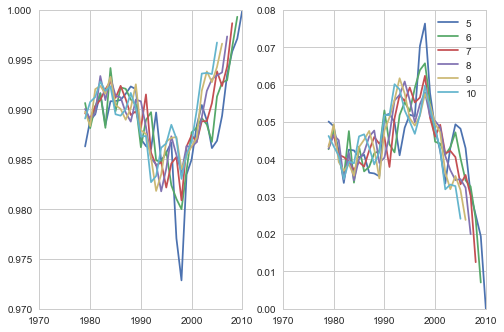

In [57]:
x = arange(0, df.speed.max() + 1)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for year_length in arange(5, 11):
    df_standard = df_all_years[str(2010):str(2014)]
    density, _ = np.histogram(df_standard['speed'], bins=x, normed=True)
    y_ecdf = sm.distributions.ECDF(df_standard.speed)(x)

    gofs = [yearly_gof(df_all_years, start_year, start_year+year_length-1, density, y_ecdf, x) 
            for start_year in arange(df_start_year, df_end_year-year_length)]

    gofs = pd.DataFrame(gofs)
    if len(gofs)>0:
        ax1.plot(gofs.year, gofs.r_square, label=year_length)
        ax2.plot(gofs.year, gofs.k_s, label=year_length)
plt.legend()

# 5. GMM by Expectation-maximization

In [58]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [59]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.436  -2.858  0.016  3.316  3.391  0.517
2  0.361   3.220  0.603  3.162  4.142  0.326
3  0.203   9.093  3.451  4.093  4.441  0.247

GMM Plot Result
0.435877030831 [[-2.85768713  0.01570393]] [ 2.32912244  4.13209111] 136.232981707
0.360623516771 [[ 3.2200526   0.60252033]] [ 2.82871537  4.37615896] 154.976695071
0.203499452398 [[ 9.09336087  3.45072384]] [ 3.67471931  4.79266471] 144.14617343


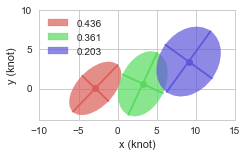

In [60]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [61]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXm4LGV9LvpW9dy9hl7zPC9A2Ci4Qbg5EUl25MgheL0e
ckESEweMxuSYE6MxKDI8wFZMDFyjSI6a4TxKROTqjR44ubkCMTdKFCXchEFkr3noeZ67a7h/LL5a
X9equat7dW/qfR4e1l6rq76vuqve/o3vjxFFUYQDBw4cnKVgj3sDDhw4cNBOOCTnwIGDsxoOyTlw
4OCshkNyDhw4OKvhkJwDBw7Oajgk58CBg7MaDsk5cODgrIZDcg4cODir4ZCcAwcOzmo4JOfAgYOz
Gg7JOXDg4KyGQ3IOHDg4q+GQnAMHDs5qOCTnwIGDsxoOyTlw4OCshkNyDhw4OKvhkJwDBw7Oajgk
58CBg7MaDsk5cODgrIZDcg4cODir4ZCcAwcOzmo4JOfAgYOzGg7JOXDg4KyGQ3IOHDg4q+GQnAMH
Ds5quI97Aw6OH6Iool6vg+M4uFwueDwesCwLhmGOe2sOHLQMRhRF8bg34eD4UKvVkMvl0N/fj0aj
AQDY39/H0NAQ+vv7wbKsQ3oOehqOJfcqBs/zqFQqSCQSCIVC4DgOHo8HoihCFEXwPA+O41Cv18Ew
DFwul0N6DnoODsm9CiGKIjiOA8/zYBgGPM9jbW0NPM/D7XZDEASUy2X4fD643Ye3CCG9Wq0GlmXh
crngcrngdrsd0nPQtXDc1VcZBEFAo9EA+dgjkQjS6TTm5+fh9XpRr9cRjUbBMAwajQbcbjeCwSAC
gQCCwSBcLlfT+ch5GIaRyM7tdh95nQMHxwXHknuVgLifPM8DADiOw+7uLgRBgMfjQX9/P+r1Ovx+
PzweDwYHBxEKhVCr1VAul5HL5RCLxSTSI8RHkxnHcRBFEbVazSE9B10Dh+ReBRAEARzHQRAEMAyD
QqGAvb09DA8PY2BgANvb202vZxgGoiiCYRj4/X74/X4MDw9DFEVUq1VUKhVks1lEo1F4PB6J8LRI
j2UPqpUajQYGBgYc0nPQMTgkd5aDxNFIMiEajSKfz2Nubk6y1IxGLBiGkciMJr1yuYxsNotIJAKv
19vk3hJyE0URlUoF8XhcSmCQ/zuWnoN2wiG5sxRy97Rer2NnZwderxcrKytSQqGVZAFNesCBxUgs
vUwmg0gkAp/PJxEeOYZYinJLzyE9B+2AQ3JnIeTuaSaTQTQaxfj4OIaHh48Qm9ySIyRkFizLSvG6
kZERifTK5TLS6TSq1SoAIJlMSuRIW3oO6TloBxySO8tAu6eCICASiaBSqWBpaQl+v//I69tZ9kGT
HgCUSiXE43EAQCqVQq1Wg9/vlyw9v9/vkJ4D2+GQ3FkCURQRi8UQDAbh8/lQrVaxs7ODUCiElZUV
iTzUjgXaS3jAAemxLIvR0VEABxZnpVJBuVxGMpmUSI/E9IySntfrdWr0HKjCIbmzAKT2LZPJwO12
o1AoIJFIYHp6GoODg5rHKpGDVXdVD/K1WJZFKBRCKBQCcNiBQbow6vW65NYSS4+cQ0569XodPM9j
aGgIHo/HIT0HEhyS63GQzgUC4g6urKzA6/UaOke31IO7XC709fWhr68PwCHplctlxONxNBqNI5Ye
ITOS8AgEAqhWq00dGQ7pvbrhkFyPQt6aVSwWUalU0N/fj7m5OcMPtdrruoH4tEgvFouB4ziJ9AjR
yy29RqPhkN6rHA7J9SDo5AIAxGIxZDIZ+P1+hMPhlh/gbiUAOelxHCeRXrFYlEpmiKXn8/kc0nPg
kFwvQV771mg0sLu7C4ZhsLKygv39fdPnbFf8rRNwu93o7+9Hf38/fD4fKpUK+vr6pOJknueleF4w
GGxKUNCkRxIZhPgc0ju74JBcj0Be+5bP57G3t4fR0VGMjo42FdnagV4kPpZlJdIDDiy9crkstaHR
Vp6c9ARBkBI4NOm53W643W6H9HoYDsn1AHielwQtRVFEJBJBoVDAwsKCVIMGWLPKyDGlUgm5XE7q
Xug1KF232+3GwMAABgYGABxYvsS9zWazEAShydKjLTia9BqNBgqFAiYmJhzS60E4JNfFkCcXSO2b
3+/H6uqqLQWxhBx2d3cxMDCAbDaLcrkMt9stuXt0Z0I3Q494PB4PPB5PE+kRSy+dTkMUxSZLj5Ae
sQiJe8swjGPp9RAckutS0O4pAKTTacRiMUxMTGBoaMiW+rZGo4GdnR0AwPLysvT7eDwurUt3JhCL
hy7d6GUQSanBwUGIothk6aXTaQBAIBCQhESJMgvQbOk5pNfdcEiuC5HJZOByueDz+SAIAvb391Gt
VlVbswjMkBwtt1Qul+HxeCSXmGEYeL1eDA8PA2juTJDXq5EOi15/qMk1e73eJtIrl8soFAqo1WrY
2NhQtPQAh/S6GQ7JdRGIe5pMJjEwMACe57Gzs4P+/n7d1iwza8RiMWSzWczOzqKvrw+JREKTHJU6
E4ibF41GwXGcahazU7A7UUKTnsfjQTqdxsTEBMrlMkqlEpLJJFiWla47EAiokh6ApvkYLpfLIb0O
wiG5LgFd+0ayp6VSyVBrFoGeJUfcU5Zlsbq62jS/wcx5XC6XYhaTDuirWTztRLvWEEVR6pH1er0I
h8PSGEdSo0d08miypy04h/SODw7JHTPktW88z6NUKoFlWVOtWYA2ORH3dGRkRCo5MXKcEShlMQnp
pVIpMAwjPfS9WJqiBIZh4PP54PP5MDQ01ER6hUJBIj1aKl6N9BKJBMLhMEKhkKSw4pCefXBI7hih
JkvudrsRDodNEZwaiHuay+UkNeB2QymgTx7+er0uxbboh7+bQScc1KBEerVaDZVKBfl8XpqPQbu3
hPSq1aqUua3X6wBwZD6GQ3rW0d1311kMeWtWNBqV4mT5fN7STS23yIgasMvlalIDVjtO/n87QMe2
/H4/otEopqamUC6Xmx5+teE43QAr7wU9H4MmPaWhQHQWnXzuxLqXz7x1SM88HJLrMOS1byRO5na7
pThZoVCw/GCR45Q6IroFcouHHo5Dz4kgpGck4WLE2moFdvQDqw0F4nleum7a0qPJzCE963BIroOQ
u6e5XA77+/sYGxvDyMiIdKO2YkkRNeB8Pn+kI0ILnYiVqdX20cNxlCTT1dSDO4V2ECh93fl8HpOT
kxBFUXUokEN61uGQXIdA676Jooj9/X2USiUsLi4eaaWySnKCIEitWVruqRzyB4JhGMl96jTkkul0
jR4tpKmkKderoLO3RocCEQvXIT19OCTXZqi1ZhEiUoo/WSG5XC6HdDqNYDCI+fl50zd1u909q1BT
D6Y15QKBAERRlLK3dl9Hu98bpfMbGQrk8/maLD056XEch3q9jv39fczMzMDj8bwqSc8huTaCbqwH
Dlqk4vE4JicnMTQ0pHqcGUtKEAREo1EUCgWp3cvsDdxLN7yaphx58EulkmrTfbfCCIkqWbiE9PSG
ApG4HylzoS09j8fTRI5nIxySawNI7dvzzz+P1dVVAMD+/j7q9TqWl5fh8/k0jzdqydVqNWmW6urq
KjKZTBOpmt2zHTHBToNoytVqNTAMg4GBgaamewBHSM8sjsOS04OWW08PBQoEAkcyt0CzpXe2k55D
cjZD3lhfKpUQjUYxMDCA2dlZQ0FzIyRDkhb0LFWr5ESOq9frXV+zpge1Gj26FYvuxuj16yWQu/U0
6QHA+vq6psiCEum5XC6pXq+XSe/s+IS7BPLaN9JcPzMzI3UDGIUaWRH3tFgsHklaWCU5kgipVqtg
GEa6sev1ui0FyccFukZP3opFuhKM1Oh1oyWnB0J6gUAA2WwWy8vL0iS0eDyuOQkNOLyX5VLxvUh6
DsnZAOKechw

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAH3RJREFUeJztnX1QVNf9/9/LxfUJlBoViARFRBP5+hClYhNrIglh6tQG
R60StdPqxNEabRKjiIqYCKIxmj802gmpbUWNRNOpcdpppzVGWx0fiD9IRBA0CIKAKFIXMGzYvb8/
8C53L/dx9+7DZT+vGUe5u/ees8DLzznnnvv5mFiWZUEQhGEI8nUHCILQBklLEAaDpCUIg0HSEoTB
IGkJwmCQtARhMEhagtCI3W7H5s2bMX/+fCxevBhVVVVOr3/55ZeYM2cO5s+fj88++8zpteLiYixe
vNjxdVVVFdLS0vDaa68hKysLdrtdsX2SliA08u9//xtWqxUFBQVYs2YNtm/f7njthx9+QG5uLg4c
OID8/HwUFBTg3r17AIC8vDxs2rQJ7e3tjvfn5ubizTffxJEjR8CyLE6dOqXYPklLEBr5+uuv8dOf
/hQAMHHiRFy9etXx2s2bNxEdHY2BAwfCbDZj8uTJuHz5MgAgOjoae/bscbpWSUkJpkyZAgCYPn06
zp8/r9h+sF4fxJt8/fXXvu4C4edMnjxZ8T1FRadgs4WJvmY2mzFu3DjR11paWhASEuL4mmEYdHR0
IDg4GC0tLQgNDXW81r9/f7S0tAAAUlJSUFNT43QtlmVhMpkc77VYLIr9NqS0AFDw3mndrmWxtCA0
NET5jX6K0fsP6PsZ5m+eoep9NlsYhkVvE32ttnqD5HkhISFobW11fG232xEcHCz6Wmtrq5PEQoKC
gpzeO2DAAMV+0/CYIDQyadIknD17FgBQVFSE0aNHO16LjY1FVVUVmpubYbVaUVhYiGeffVbyWmPH
jsXFixcBAGfPnkVCQoJi+4aNtAThK5KTk3Hu3DksWLAALMti27ZtOHnyJNra2jB//nysX78eS5cu
BcuymDNnDsLDwyWvlZ6ejszMTOzevRsjR45ESkqKYvskLUFoJCgoCO+9957TsdjYWMe/k5KSkJSU
JHpuVFSU022gmJgYHDp0SFv7mt5NEITPIWkJwmCQtARhMEhagjAYJC1BGAySliAMBklLEAaDpCUI
g0GbK4iA5v73Fb7ugmZIWiKguYUXRY9HeLcbmqDhMUEYDJKWIAyGT6Tl58lxJUcOQQQyXpdWmCfH
lRw5BBHIeH0hisuTs27dOgDdc+ScO3cOycnJitexWFp07Zfe1/M2Ru8/0DM+gzfwurTCPDmu5MgB
oGt6FaOna/F2/2/cewQAGDW4r27XNPrPwJv4/JaPKzlyCO/CScondlw0bnxb7XRMT4kJaXwuLZcj
JzExEWfPnsXUqVN93SXiMZysseOiRV8XHieJvYPPpXUlRw7hWZRklYL//pvfVjtFaBJYP3wiLT9P
jis5cgj94QumVVYxenIUttvt2LJlC65fvw6z2Yzs7GwMHz7c8fqXX36Jjz76CMHBwZgzZw5++ctf
Sp5TWlqKrKwsMAyDESNGICcnx2nKKAZtrghwbtx75BRZ9RBWDO7a3PW5dvntGwVXyoJInbN3716s
XLkSn376KaxWK7766ivF9n0+PCZ8g96RVQvC9m5+W407bQDTriyvP0RotWVBADjKghQVFYme88wz
z6C5uRksy6K1tdWR9FwOkjaA8KWocsSOi4bFYpHNxA84z5P1kreqrVr0uNwDA66UBZE6Z8SIEXjv
vfewf/9+hIaGIjExUbHPJG0A4K+yaoXfd/4c2R2B/2d/TvM5rpQFkTonJycHhw8fRlxcHA4fPozt
27cjKytLtn2a0/ZQhPNFT85XfYEvP48rZUGkzhk4cKAjAg8dOhQPHz5UbJ8ibQ+jp0RVtXCbPLw5
13WlLIjYOQCQnZ2Nt956C8HBwejVqxe2bt2q2D5J2wPgL+IEgqhi3Lj3yGviulIWROwcAEhISMDR
o0c1tU/SGhxXN0K4S0lzs+Rr8WHiNV89Rey4aMcilT+sLnsaktag8GVV+5CFGuRk5BM7Wnx99WZ5
fbdreENiTtxAgKQ1GO7MWdUIKSWjWoTn8yX2dgTuqZC0BkHrMFhKUHel1ArXHicvies+JK2fo0VW
oajeFlSO2NERFHV1gqT1U7TIWmm1gnksgz+JKoSirj6QtH6IGmH5UTUyaoDiFkB/gqKue5C0foSS
rFLDX6nV428s93TsHTA+dLBu1xJG3WiG0e3aPR2S1g/QIqvU8FdM0LiYoTr0rpOKyruibbgrMhd1
K61WjHfjOq7e7rn+sE70+Ct+bIbfdG327NmOPZhRUVHIzc31cY+8g5ywSrJyEtlsNjAMo6ukQsSu
zRfZHXljR0fAYrGgpM694bIrGyuC7eNcasuX+IW07e3tYFkW+fn5vu6K15C73yonKz/acSKpeazN
E3Dt6ykvLVIp4xfSlpWV4dGjR1iyZAk6Ojrw9ttvY+LEib7ulseQiq5SsgqHpWJRr7itUZe+Teg3
RPM5/P58U3kXgOvykrjK+IW0ffr0wdKlSzFv3jzcunULr7/+Ov7xj3/IPsVvxGTld9q6/h0ZO9ix
gFRptXYdj+pMIfv/mhuczh0W3vUAtcViQQUE/bUB0YPcyxtc3dSCKxbxOV4c1F07YnBf1Da0OPo/
iumnun3u+zE0sj/qah5q2p5ps9kCJtm5X0gbExOD4cOHw2QyISYmBmFhYWhsbERkZKTkOUZLVn7j
3iMwjHN05SIrwzCOyMpFVeEcVRhJ46O6vjd6DY/jJa5RVtOI7/A9AHWR+OnH16movItKtKuKusLP
cJdp1fSZ7jIPEBra8x8WAPxE2uPHj6O8vBxbtmxBQ0MDWlpaMGSI9mGaP6I0FBbKCnQNN4WiPh3V
/XtSbK2DLdgGxqotykwwS/+HKITfbnFNV5+UBI6LGarbfJfowi+knTt3LjIyMpCWlgaTyYRt27ap
SnDl74gJK5QV6BJWTFYnYazdh67PRAxBi8WCEI2Rtri++7XUiMz1p6ymEcVtjarEBboWq9SKGzs6
AiXl9TSvFcEvzDCbzdi1a5evu6EraoTly1rc1thN1mJrnZOoz0ToN/oQXqu0vtGpLSWBn44aolpc
wDnqUsR1D7+QtqehJKxwKMzJyokKdEVVoVzV7K1u7dn62NDE3u92PNo0QnWfhe3wI7GUwK6Kq4ab
5fWq3heIkLQ6IxRWeBtHLLoKo+ozEUMcclazrRASPyjc6WtLiwWhId2HxyVNtyT7qSQ0X2JOYDF5
OXG1oDba0tBYHFXSWiwWVFdXIygoCFFRUYbanO5Nbtx7pGo43BZuckTX9qEdDln7h3cKyokqlFMr
UueXNDU4RWw1AnPDZ6mo64loS4gjK+2ZM2fwySef4MaNG4iIiEBwcDDq6uoQGxuLJUuW4IUXXvBW
P/0aLfPXtvDOWrz8oTAnK9AlWkfQt+iA/C+3q1vwhDLzI7KUwHLiuhJtjYyetXzu37+PTZs24eHD
h7DZbHj//fcRHS3/OKaktOvXr8fgwYOxefNmxMXFOb1WUVGB48eP4+TJk/jggw/c/Bb0DMT2DmsR
Nn5QuJOoYwbILwRdf1iHjqBvddk7y5eYE1hMXk5cT6N1PnvTyylU+XV5ioqKsH37duzfvx9AVy2f
48ePo2/fvkhLS0NSUhKuXLkies7OnTsxa9YszJw5ExcuXMB3333nurRvvfUWwsPFh1dxcXHIyMhA
fT0tFgiHxEBnlFUSlj9vHTP4rqisA4POS2bAHzMgUvIJFXeIHxSOkqYG5Te6iNqhsdr5rLvJ3CQ/
q0wuAT1r+Vy5cgVjxozBr3/9awwbNgwbN25U7LNkhQFOWLHkyenp6Z2fK8J/syR4A7Fqb/yFJ+H9
VylhgU4Jxwy

## Goodness-of-fit Statistics

In [62]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.943  0.028      0.056  1.839967e-07      0.047       0.370

In [63]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [64]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [65]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -16.436668727939214
     jac: array([ -1.65353060e-01,  -2.38418579e-07,   4.76837158e-07,
         2.38418579e-07,   2.38418579e-07,   0.00000000e+00,
        -1.65351391e-01,   2.38418579e-07,   2.38418579e-07,
         2.38418579e-07,   0.00000000e+00,   2.38418579e-07,
        -1.65351629e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1699
     nit: 84
    njev: 84
  status: 0
 success: True
       x: array([  0.8258362 ,   2.13416041,   0.88943354,   5.58488962,
         4.40851075,   0.49124772,   0.13885533,  -3.15469113,
         1.36439167,   2.08379994,   2.27790552,   0.63246654,
         0.03530846,  11.6533253 ,   1.2834805 ,   4.94313588,
         8.17392995,   0.86665403])

## 6.1 GMM Result

In [66]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x mean_y  sig_x  sig_y   corr
1  0.826   2.134  0.889  5.585  4.409  0.491
2  0.139  -3.155  1.364  2.084  2.278  0.632
3  0.035  11.653  1.283  4.943  8.174  0.867

GMM Plot Result
0.825836204526 [[ 2.13416041  0.88943354]] [ 3.44460038  6.22580817] -57.959543875
0.138855331309 [[-3.15469113  1.36439167]] [ 1.31670474  2.79237611] 139.013044096
0.0353084641649 [[ 11.6533253   1.2834805]] [ 2.16677984  9.3033751 ] 150.58934679


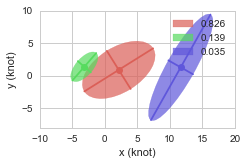

In [67]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Goodness-of-fit statistics

In [68]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.978  0.011      0.029  7.271859e-08      0.029       0.232

In [69]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUI3d9L/qp0r70vm/qReOJwSyzGDu5xiSnwwQfkhwC
c+OxQ7iHPN8H9wTIhfhymQTb+A5jj8nie98LfuZiltxnJ2F4TiAMyc15jCdkEucBs2SSazAT3KvU
LXW3WvtaquX9oflVl0pVUlVJpZba9Tmnz/RI+tWvWqr66PPdKUEQBFiwYMHCAQW93ydgwYIFC2bC
IjkLFiwcaFgkZ8GChQMNi+QsWLBwoGGRnAULFg40LJKzYMHCgYZFchYsWDjQsEjOggULBxoWyVmw
YOFAwyI5CxYsHGhYJGfBgoUDDYvkLFiwcKBhkZwFCxYONCySs2DBwoGGRXIWLFg40LBIzoIFCwca
FslZsGDhQMMiOQsWLBxoWCRnwYKFAw2L5CxYsHCgYZGcBQsWDjQskrNgwcKBhkVyFixYONCwSM6C
BQsHGhbJWbBg4UDDvt8nYGH/IQgCGIYBy7Kw2WxwOBygaRoURe33qVmw0DQoQRCE/T4JC/uHUqmE
VCqFnp4elMtlAMDm5iYGBgbQ09MDmqYt0rPQ1bCU3OsYHMehUChgZ2cHPp8PLMvC4XBAEAQIggCO
48CyLBiGAUVRsNlsFulZ6DpYJPc6hCAIYFkWHMeBoihwHIelpSVwHAe73Q6e55HP5+FyuWC3710i
hPRKpRJomobNZoPNZoPdbrdIz0LHwjJXX2fgeR7lchnkY49EIojH4wgEAnA6nWAYBtFoFBRFoVwu
w263w+v1wuPxwOv1wmazVR2PHIeiKJHs7HZ7zessWNgvWErudQJifnIcBwBgWRbhcBg8z8PhcKCn
pwcMw8DtdsPhcKCvrw8+nw+lUgn5fB6pVApbW1si6RHik5IZy7IQBAGlUskiPQsdA4vkXgfgeR4s
y4LneVAUhUwmg42NDQwODqK3txfr6+tVr6coCoIggKIouN1uuN1uDA4OQhAEFItFFAoFJJNJRKNR
OBwOkfDqkR5NV7KVyuUyent7LdKz0DZYJHfAQfxoJJgQjUaRTqcxMzMjKjWtHguKokQyk5JePp9H
MplEJBKB0+msMm8JuQmCgEKhgO3tbTGAQf61lJ4FM2GR3AGF3DxlGAahUAhOpxPBYFAMKDQTLJCS
HlBRjETpJRIJRCIRuFwukfDIGqIU5UrPIj0LZsAiuQMIuXmaSCQQjUYxOjqKwcHBGmKTKzlCQnpB
07TorxsaGhJJL5/PIx6Po1gsAgBisZhIjlKlZ5GeBTNgkdwBg9Q85XkekUgEhUIB8/PzcLvdNa83
M+1DSnoAkMvlsL29DQDY3d1FqVSC2+0WlZ7b7bZIz0LLYZHcAYEgCNja2oLX64XL5UKxWEQoFILP
50MwGBTJQ20tYC7hARXSo2kaw8PDACqKs1AoIJ/PIxaLiaRHfHpaSc/pdFo5ehZUYZHcAQDJfUsk
ErDb7chkMtjZ2cHk5CT6+vrqrlUiB6PmaiPI96JpGj6fDz6fD8BeBQapwmAYRjRridIjx5CTHsMw
4DgOAwMDcDgcFulZEGGRXJeDVC4QEHMwGAzC6XRqOkan5IPbbDb4/X74/X4Ae6SXz+exvb2Ncrlc
o/QImZGAh8fjQbFYrKrIsEjv9Q2L5LoU8tKsbDaLQqGAnp4ezMzMaL6p1V7XCcRXj/S2trbAsqxI
eoTo5UqvXC5bpPc6h0VyXQhpcAEAtra2kEgk4Ha70d/f3/QN3KkEICc9lmVF0stms2LKDFF6LpfL
Ij0LFsl1E+S5b+VyGeFwGBRFIRgMYnNzU/cxzfK/tQN2ux09PT3o6emBy+VCoVCA3+8Xk5M5jhP9
eV6vtypAISU9EsggxGeR3sGCRXJdAnnuWzqdxsbGBoaHhzE8PFyVZNsKdCPx0TQtkh5QUXr5fF4s
Q5OqPDnp8TwvBnCkpGe322G32y3S62JYJNcF4DhObGgpCAIikQgymQxmZ2fFHDTAmCqT1qlKH+s2
KP3ddrsdvb296O3tBVBRvsS8TSaT4Hm+SulJFZyU9MrlMjKZDMbGxizS60JYJNfBkAcXSO6b2+3G
oUOHrIRYGRoRj8PhgMPhqCI9ovTi8TgEQahSeoT0iCIk5i1FUZbS6yJYJNehkJqnABCPx7G1tYWx
sTEMDAy0LL9N6qNq5jjdCNJSqq+vD4IgVCm9eDwOAPB4PGIjUanilSo9i/Q6GxbJdSASiQRsNhtc
Lhd4nsfm5iaKxaJqaRbB64WczABFUXA6nXA6nVWkl8/nkclkUCqVsLKyoqj0AIv0OhkWyXUQiHka
i8XQ29sLjuMQCoXQ09PTsDSrGRwEcmz1+UtJz+FwIB6PY2xsDPl8HrlcDrFYDDRNi4Tn8XhUSQ9A
1XwMm81mkV4bYZFch0Ca+0aip7lcTlNpFkGryKpbSc8s4hAEQayRdTqd6O/vF8c4khw90idPGsiQ
KjiL9PYPFsntM+S5bxzHIZfLgaZpXaVZgHFy6lZS209QFAWXywWXy4WBgYEq0stkMiLpSVvFq5He
zs4O+vv74fP5xA4rFum1DhbJ7SPU2pLb7Xb09/frIjgL5kGeYqMEJdIrlUooFApIp9PifAypeUtI
r1gsipFbhmEAoGY+hkV6xmGR3D5BXpoVjUaRTCYxPT2NdDpt6KJuVsnJ/7VQgdH3lMzHkJKe0lAg
aRSdfO5E3ctn3lqkpx8WybUZ8ty3crmMUCgEu92OQ4cOia2SDqrZadb5aVFbzaAV9cBqQ4E4jhPn
Y0iVnpTMLNIzDovk2gi5eZpKpbC5uYmRkREMDQ2JF2ozZNXudXrQrTeiGQQqnY+RTqcxPj4OQRBU
hwJZpGccFsm1CdK+b4IgYHNzE7lcDnNzc+IgGIJ2BxDkNwRFUaL5ZMF8SKO3WocCkfkYFuk1hkVy
JkOtNMvj8SAYDCqWZjVDVkbJied5MAwDh8NhaP1+w0wlarYprHR8LUOBXC5XldKTkx7LsmAYBpub
m5iamoLD4Xhdkp5FciZCWlgPVIa3bG9vY3x8HAMDA6rrjJJVM2ZuKBQS1YDNZoPdbhdvpG65Ibrl
POXQQqLyoUBS0ms0FIj4/Uiai1TpORyOKnI8iLBIzgSQ3Lcf/vCHOHToEABgc3MTDMNgYWEBLper
7vp2BhDS6TRYlkV/fz8GBwfBcRx2dnZQLBYRjUbBsqx4c8lLmV4v2A8l1whKpKc0FMjj8dREboFq
pXfQSc8iuRZDXlify+UQjUbR29uL6elpTaVZ7fDJkeleqVQKdrtdLPonNbM0TWN0dFSxaF2a4Nqt
5u1Bg3wokJT0AGB5eVlsFS8fCgQokx5R9N1OehbJtRDy3DdSXD81NSW299EKM0mOpK2Qqorl5eWa
deT/0vZE0qJ1aSmTVOkdxPZPnajkGoGQnsfjQTKZxMLCgjgJbXt7u+4kNGDvWpa3iu9G0rNIrgUg
5inLsmL/sXA4DEEQEAgExJkEWmGmuUqqKoaGhqo6Csv3Vzsvef2mPMHV4XBUKT2zmgrIQSKU3Qgz
SZQcW89QIOkkNHkgo1QqgaKomoqMToZFck1CrTRrcHAQLMsaugCMXvD1yFEQBGxvbyORSGB6elo3
8artJ09wJTeO1BlOSK+bvv2lMJuEAHObCygdW4n0SANRQnpSpScPQEln3sbjcfT398Pj8Yhk2UnE
Z5FcE5DnvkWjUaTTaczMzMDn8+1L5YLSOjLwBoBYVdFoP6PnreYMJyYSUOmXJ5+x0Mno5vQU8uXb
CDabrWY+BvnsSABKmqMnJb1cLgev1wuaprG5uYnx8XH09/eb9jfphUVyBiDPfSuVSgiFQnA4HAgG
gyKJ7HdSLwB

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAH3RJREFUeJztnX1QVNf9/9/LxfUJlBoViARFRBP5+hClYhNrIglh6tQG
R60StdPqxNEabRKjiIqYCKIxmj802gmpbUWNRNOpcdpppzVGWx0fiD9IRBA0CIKAKFIXMGzYvb8/
8C53L/dx9+7DZT+vGUe5u/ees8DLzznnnvv5mFiWZUEQhGEI8nUHCILQBklLEAaDpCUIg0HSEoTB
IGkJwmCQtARhMEhagtCI3W7H5s2bMX/+fCxevBhVVVVOr3/55ZeYM2cO5s+fj88++8zpteLiYixe
vNjxdVVVFdLS0vDaa68hKysLdrtdsX2SliA08u9//xtWqxUFBQVYs2YNtm/f7njthx9+QG5uLg4c
OID8/HwUFBTg3r17AIC8vDxs2rQJ7e3tjvfn5ubizTffxJEjR8CyLE6dOqXYPklLEBr5+uuv8dOf
/hQAMHHiRFy9etXx2s2bNxEdHY2BAwfCbDZj8uTJuHz5MgAgOjoae/bscbpWSUkJpkyZAgCYPn06
zp8/r9h+sF4fxJt8/fXXvu4C4edMnjxZ8T1FRadgs4WJvmY2mzFu3DjR11paWhASEuL4mmEYdHR0
IDg4GC0tLQgNDXW81r9/f7S0tAAAUlJSUFNT43QtlmVhMpkc77VYLIr9NqS0AFDw3mndrmWxtCA0
NET5jX6K0fsP6PsZ5m+eoep9NlsYhkVvE32ttnqD5HkhISFobW11fG232xEcHCz6Wmtrq5PEQoKC
gpzeO2DAAMV+0/CYIDQyadIknD17FgBQVFSE0aNHO16LjY1FVVUVmpubYbVaUVhYiGeffVbyWmPH
jsXFixcBAGfPnkVCQoJi+4aNtAThK5KTk3Hu3DksWLAALMti27ZtOHnyJNra2jB//nysX78eS5cu
BcuymDNnDsLDwyWvlZ6ejszMTOzevRsjR45ESkqKYvskLUFoJCgoCO+9957TsdjYWMe/k5KSkJSU
JHpuVFSU022gmJgYHDp0SFv7mt5NEITPIWkJwmCQtARhMEhagjAYJC1BGAySliAMBklLEAaDpCUI
g0GbK4iA5v73Fb7ugmZIWiKguYUXRY9HeLcbmqDhMUEYDJKWIAyGT6Tl58lxJUcOQQQyXpdWmCfH
lRw5BBHIeH0hisuTs27dOgDdc+ScO3cOycnJitexWFp07Zfe1/M2Ru8/0DM+gzfwurTCPDmu5MgB
oGt6FaOna/F2/2/cewQAGDW4r27XNPrPwJv4/JaPKzlyCO/CScondlw0bnxb7XRMT4kJaXwuLZcj
JzExEWfPnsXUqVN93SXiMZysseOiRV8XHieJvYPPpXUlRw7hWZRklYL//pvfVjtFaBJYP3wiLT9P
jis5cgj94QumVVYxenIUttvt2LJlC65fvw6z2Yzs7GwMHz7c8fqXX36Jjz76CMHBwZgzZw5++ctf
Sp5TWlqKrKwsMAyDESNGICcnx2nKKAZtrghwbtx75BRZ9RBWDO7a3PW5dvntGwVXyoJInbN3716s
XLkSn376KaxWK7766ivF9n0+PCZ8g96RVQvC9m5+W407bQDTriyvP0RotWVBADjKghQVFYme88wz
z6C5uRksy6K1tdWR9FwOkjaA8KWocsSOi4bFYpHNxA84z5P1kreqrVr0uNwDA66UBZE6Z8SIEXjv
vfewf/9+hIaGIjExUbHPJG0A4K+yaoXfd/4c2R2B/2d/TvM5rpQFkTonJycHhw8fRlxcHA4fPozt
27cjKytLtn2a0/ZQhPNFT85XfYEvP48rZUGkzhk4cKAjAg8dOhQPHz5UbJ8ibQ+jp0RVtXCbPLw5
13WlLIjYOQCQnZ2Nt956C8HBwejVqxe2bt2q2D5J2wPgL+IEgqhi3Lj3yGviulIWROwcAEhISMDR
o0c1tU/SGhxXN0K4S0lzs+Rr8WHiNV89Rey4aMcilT+sLnsaktag8GVV+5CFGuRk5BM7Wnx99WZ5
fbdreENiTtxAgKQ1GO7MWdUIKSWjWoTn8yX2dgTuqZC0BkHrMFhKUHel1ArXHicvies+JK2fo0VW
oajeFlSO2NERFHV1gqT1U7TIWmm1gnksgz+JKoSirj6QtH6IGmH5UTUyaoDiFkB/gqKue5C0foSS
rFLDX6nV428s93TsHTA+dLBu1xJG3WiG0e3aPR2S1g/QIqvU8FdM0LiYoTr0rpOKyruibbgrMhd1
K61WjHfjOq7e7rn+sE70+Ct+bIbfdG327NmOPZhRUVHIzc31cY+8g5ywSrJyEtlsNjAMo6ukQsSu
zRfZHXljR0fAYrGgpM694bIrGyuC7eNcasuX+IW07e3tYFkW+fn5vu6K15C73yonKz/acSKpeazN
E3Dt6ykvLVIp4xfSlpWV4dGjR1iyZAk6Ojrw9ttvY+LEib7ulseQiq5SsgqHpWJRr7itUZe+Teg3
RPM5/P58U3kXgOvykrjK+IW0ffr0wdKlSzFv3jzcunULr7/+Ov7xj3/IPsVvxGTld9q6/h0ZO9ix
gFRptXYdj+pMIfv/mhuczh0W3vUAtcViQQUE/bUB0YPcyxtc3dSCKxbxOV4c1F07YnBf1Da0OPo/
iumnun3u+zE0sj/qah5q2p5ps9kCJtm5X0gbExOD4cOHw2QyISYmBmFhYWhsbERkZKTkOUZLVn7j
3iMwjHN05SIrwzCOyMpFVeEcVRhJ46O6vjd6DY/jJa5RVtOI7/A9AHWR+OnH16movItKtKuKusLP
cJdp1fSZ7jIPEBra8x8WAPxE2uPHj6O8vBxbtmxBQ0MDWlpaMGSI9mGaP6I0FBbKCnQNN4WiPh3V
/XtSbK2DLdgGxqotykwwS/+HKITfbnFNV5+UBI6LGarbfJfowi+knTt3LjIyMpCWlgaTyYRt27ap
SnDl74gJK5QV6BJWTFYnYazdh67PRAxBi8WCEI2Rtri++7XUiMz1p6ymEcVtjarEBboWq9SKGzs6
AiXl9TSvFcEvzDCbzdi1a5evu6EraoTly1rc1thN1mJrnZOoz0ToN/oQXqu0vtGpLSWBn44aolpc
wDnqUsR1D7+QtqehJKxwKMzJyokKdEVVoVzV7K1u7dn62NDE3u92PNo0QnWfhe3wI7GUwK6Kq4ab
5fWq3heIkLQ6IxRWeBtHLLoKo+ozEUMcclazrRASPyjc6WtLiwWhId2HxyVNtyT7qSQ0X2JOYDF5
OXG1oDba0tBYHFXSWiwWVFdXIygoCFFRUYbanO5Nbtx7pGo43BZuckTX9qEdDln7h3cKyokqlFMr
UueXNDU4RWw1AnPDZ6mo64loS4gjK+2ZM2fwySef4MaNG4iIiEBwcDDq6uoQGxuLJUuW4IUXXvBW
P/0aLfPXtvDOWrz8oTAnK9AlWkfQt+iA/C+3q1vwhDLzI7KUwHLiuhJtjYyetXzu37+PTZs24eHD
h7DZbHj//fcRHS3/OKaktOvXr8fgwYOxefNmxMXFOb1WUVGB48eP4+TJk/jggw/c/Bb0DMT2DmsR
Nn5QuJOoYwbILwRdf1iHjqBvddk7y5eYE1hMXk5cT6N1PnvTyylU+XV5ioqKsH37duzfvx9AVy2f
48ePo2/fvkhLS0NSUhKuXLkies7OnTsxa9YszJw5ExcuXMB3333nurRvvfUWwsPFh1dxcXHIyMhA
fT0tFgiHxEBnlFUSlj9vHTP4rqisA4POS2bAHzMgUvIJFXeIHxSOkqYG5Te6iNqhsdr5rLvJ3CQ/
q0wuAT1r+Vy5cgVjxozBr3/9awwbNgwbN25U7LNkhQFOWLHkyenp6Z2fK8J/syR4A7Fqb/yFJ+H9
VylhgU4Jxwy

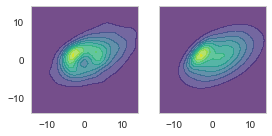

In [70]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='', ylabel='', colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='', ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [71]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [72]:
%%time
x = arange(0, max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x= x)

Wall time: 2.79 s


Speed Distribution Comparison
(0.93904633729677411, 0.87555197842946586, 0.91950688388153101)
Wall time: 19.9 s


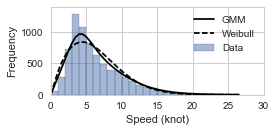

In [73]:
%%time
# Calculate Speed Distribution
# 1. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em))

In [74]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlAVOX+x/H3LAzLDCCCQpogoJJrCu5rilzNNTXDJa2r
Zeb9ZYtaalkupHZtu5VZ3mtWtmlmJZVakkqpmIyiokmuuIugoDPDPuf3BzmBkiuzAN/XX8w5Zw4f
jvLleZ55nnNUiqIoCCFEBVI7O4AQouqRwiKEqHBSWIQQFU4KixCiwklhEUJUOCksQogKZ9fCsmvX
LkaNGnXV9p9//pkhQ4YQGxvLihUr7BlBCOEEWnud+L///S+rV6/G09OzzPbCwkLmzZvHypUr8fT0
ZPjw4fTo0YOAgAB7RRFCOJjdWizBwcG8/fbbV20/dOgQwcHB+Pr6otPpiIqKYvv27faKIYRwAru1
WHr16sWJEyeu2m4ymfD29ra91uv1mEym657PaDRWaD4hxI2Lioq6qePtVlj+jsFgwGw2216bzeYy
heZabvaHszej0ehymcA1c23btg29Xk/6uQL2nrBiTEll3bKZmC6corio0HZc+z7jad8zlj/++IM1
7z+Oh94Xjc4TtVoLKhV6n9oogOXiOSw5ZykqyANubFWKVueJm7sXWjdPtO5eeHp6otJ4oNa64+bu
idbNA5XGDY3WHZ27OxqtO4pKi87dA/8aei7mKiho0Lm7U6umgWxTMVZFjZtOh1qjxaqoUak16HRu
qNUaihU1Op0bdwQYOHs+l8IiK27akk5CYZEVoMxrN60ab0+4lPvX6yB/L85kWf72vUH+XgDUCTAw
ZVTrivinusqt/FF3eGEJDw8nPT2d7OxsvLy8SE5OZuzYsY6OIewsNzeXr7/+mtU/JPDr5q2cPn4A
a3ERkT0epGu/sRTiiTnnHD4BIfjVqoui1mG1KmScTuf7j2Zy9lQ6Ko0buaYLwAXbeS+eSwdAo9Xh
4e1P7boBqN190Hn64mmoQe1aAeRZPdC4e+Ol90HnaUCl9cJN54lO54aP3o2snHzbL7FKXfLa39cD
UMjKyQco89rf1wMvDy2WvMIyr31Lvf6799bw9kClUtm+r49eV+bY0q999DoUa8EVx3Kd95aIbhts
v3/MW+CwwhIfH4/FYiE2NpapU6cyduxYFEVhyJAhBAYGOiqGsJPMzEwSEhI4dT6fQkMTTpw+z8Jp
o7Fai9Fo3KgZFIpPQCjuviGkH9zL0YP7qBvRkeyzhziy91cUa3GZ82nc3PGuWQeDXx28awbhYaiF
l28gPn61CQy6g0v5WnRuGoL8va76hbf8zS+8j16Hl0fJf/mavp5cyL5I+J1+RLf1If3URc6cN1PT
xxNUUFBYTFBNfZl9Da449srXN/Pevzv20PGMqzJd/73BREbUdvQ/+TWpKsvqZlds3rtiJnBcrhMn
TrBq1SpWrlzJr7/+iqIo3FG/KbET3wEgaeN36PQB6N3hbPoejh9O5fypNIoL823nUGt11KgdSo3a
9TH4B1MzsD4NGjZCpfPh/MUC3LRq219soEzxqOnrafvlCqnz1y/ela91Wk25v4iu+O9XVTI5vCsk
KreioiK02pL/Nvfffz/btm1DpVJxR/1mBIVFEXJXG3KyTnNkXxJH927l3LE9FBfm2d7vExCM/51N
qBfWBJ1vfbwDgnEv1UW5XDgAVCqVrXhUhr/S4i9SWMQN2bFjB++99x6rV69mxfebSdp3Ae/wfxDl
F0XjVt1QK3kYt6xnw8rXyT57yPY+75p3EhgWSVjE3QSF3o250N026GjJK+SiuRBfgzvhdX3LNPel
eFRuUljE31IUhQ0bNjB9xiy2bUkEwMcvkDeXriMkvAneQU3JPLeR75Y+T/aZgwCo1BruCIuicWRX
AkMjKVDXsA2U6r288CjVhSkZO5DiURVJYRF/a/v27URHRwNQr2Ekkfc8gM6/MRnH97Nr6SyO7vsV
a3ERKpWaO8JbE9GqO951I9F5GqhX2wBgGwu5kH2ROgEGKSTVhBQWUcbOnTv5du0veN3ZkdOZFpp3
iSW8eRfq1W/EgV2bSIyfxIU/Wyc+/ncS3LwnwU274+ldk3q1DVjyCiksUlCrVS4/UHordqRlsP63
Y5zJMhPkr6enFMpySWERAJw5c4apU6fy8ccfo9a4MXbGF3h5+9GgXSxH96znp09nYc45B6io07A9
DdoMIKJpFOcvFgDgpimZvOXl4caoPk2q5C/bjrQMlv2wz/b6dKbJ9vpWf95t27bx1FNP0aBBAxRF
ITs7mwkTJtCnT59yjz916hT79++nR48et/T9HEUKSzWnKApz/r2Q+XOeJ9d8Eb/AUDr0eQx3L29S
k75ny7qPseRkoNG607LLYO5qN5BCTU3ctGr0njpUKpVtALaqd3XW/3as3O0Jvx27rZ+5ffv2vPHG
GwBs3ryZ1157jdDQUBo3bnzVsUlJSRw+fFgKi3Btn32dwEtTn8BN58E9g56gZoNozh7ZycevjCEn
8zgarRsNWg8gov39NAyrB1BmDkl1GoA9k2Uuf/v58rffCg8PD2JjY/nhhx/45JNPOHPmDBkZGfTo
0YOJEyeyePFi8vLyaNWqFd7e3rzzzjsoioLZbLYVJFcghaWa+van30g7o2ZnWgGR/xhPxN2d0GkU
flr5MqcObkelUtO84wDaxYxC7e5b7rhJdRPkr+d05tULZoNq6iv0+/j7+/Pjjz/Su3dvhg4dSn5+
Pl27duXpp59m3LhxHD58mOjoaD799FMWLFhAYGAg7733HmvXruXxxx+v0Cy3SgpLNVNQUMDDj/4f
yz/5gPv/9QbFXqGEtPgHKVu+JC3pS6zFRdQKbs7dPR+lWbPmtvdV1XGTm9GzbXCZMZbLKnqdzqlT
p2jVqhV79uwhKSkJg8FAQUHBVccFBgby8ssv4+XlxdmzZ4mMjKzQHLdDCks1cuzYMWJjY0lKSqJm
YAjunt6cPXeYbfFvkHPuKJ7eAfQY/H/UadSBomKqfQvlSpevQcJvx+w2ic9isfDll19y//33k5ub
y+zZs0lPT2fFihUoioJarcZqLVndPGPGDH766ScMBgPPPfccrrQ6RwpLNfHJyh95fOxwTBfPE9Ls
Hu65byK/b/ua7Qmfolit1L+7Fy26/5Ow4JIFodJCKV9kRO0Kvy5JSUmMGjUKtVpNdnY2TzzxBKGh
oUyaNImUlBR0Oh0hISFkZGTQqFEjFi1aRNOmTRkwYAAjR47E09OTgIAAMjIyKjTX7ZDCUg3sSMvg
jXf+h/lSNvcMegJD3Ui+W/o8WSd/x9svkC73PYVPnRaoVFT5T3ZcTbt27di6davtden5PqtXr77q
+MDAQNatWwdA3759HRPyFkhhqeKys7NZ/9sxOvd/jAYtupKfa2Ltkonk514iuElX+j74LO4eJYOP
0koRFUUe/1FF7UjLoPfQCQSHRrA5eR+5ecUc+T2Jb/83jaLCPDoPnEjHQc/i6WWgToBBioqoUNJi
qYIOns7jrUXT2fLDErz9AimwXOL7j9/j1B9b8fWvQ9+HZlL7zoZ2vZ2hqN6ksFRBi97/gC0/fIC3
XyB9Rr9IwpdvkHnqILVDWjD4kTl46H0A17udoag6pLBUMUuWLGHTdx/gXaM23Qc/yfcfvoQpJ5OI
qF7c/Y/H8fL2lY+Qhd1JYalCdqRlcNRSl8DQloS3upe1n86lIN9M537jiOo+jLq1vKXrIxxCBm+r
iBXxm/gofg+mIg/u7voA2+LfoDDfQvf7n6V1j+GoVCrp+rio48ePM3HiRB544AHi4uIYN24cBw4c
4O2336Zx48acPXvWdmxWVhZNmzZl1apVnDhxgoiICBYvXlzmfOPHjy/30caOJC2WKmDXrl2MfqAv
wRGtadKmNwm

0.0436819261832 0.0722968590444
5.0 2.5
Wall time: 24 s


Direction Distribution Comparison


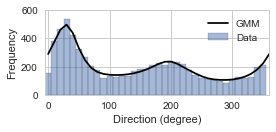

In [75]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')

In [76]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.839668835201
Wall time: 9.56 s


## 6.3 Sectoral Comaprison

In [ ]:
# %%time
# curve_collection=Parallel(n_jobs=-1)(delayed(direction_compare2)
#                                      (gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre))  

In [ ]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 5.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

In [ ]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

In [ ]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [ ]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [ ]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [ ]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [ ]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

In [ ]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [ ]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

### 6.4.3 Adjacent Sector Variability

In [ ]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [ ]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

# 7. Result Variability & Cross-Validation

In [ ]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

## 7.1 Variability of the Result

In [ ]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [ ]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

In [ ]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

In [ ]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [ ]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [ ]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [ ]:

import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)